In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
from imblearn.over_sampling import SMOTENC

from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.model_selection import cross_validate

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler

In [ ]:
#from google.colab import auth
#PROJECT_ID = "" # @param {type: "string"}
#auth.authenticate_user(project_id=PROJECT_ID)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/[Kompi 5] Data Rangers/Colab Notebooks/finalproject.csv')
df2 = pd.read_excel('/content/drive/MyDrive/[Kompi 5] Data Rangers/Colab Notebooks/addon_data.xlsx')
df3 = pd.merge(df1, df2, left_on='TIME_PERIOD', right_on='Year', how='inner')

df3

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,MEASURE,Measure,...,Indicator,Value,GDP_per_Capita_USD,Entity_y,Code_y,Primary energy consumption per GDP (kWh/$),Population_Density_people_per_km2,consumption CO2 per-capita,consumption-based CO2‚ emissions,production based CO2‚ emissions
0,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,CO2_PBEM,Production-based CO2 emissions,...,Annual production-based emissions of carbon di...,9.45,32834.3,Spain,ESP,1.014637,92.08,62.643.604,293601760,14087912000
1,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,CO2_PBEM,Production-based CO2 emissions,...,Annual production-based emissions of carbon di...,0.20,32834.3,Spain,ESP,1.014637,92.08,62.643.604,293601760,14087912000
2,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,CO2_PBEM,Production-based CO2 emissions,...,Annual production-based emissions of carbon di...,273.59,32834.3,Spain,ESP,1.014637,92.08,62.643.604,293601760,14087912000
3,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,CO2_PBEM,Production-based CO2 emissions,...,Annual growth in production-based emissions of...,13.96,32834.3,Spain,ESP,1.014637,92.08,62.643.604,293601760,14087912000
4,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,CO2_PBEM,Production-based CO2 emissions,...,Annual percentage growth in production-based e...,5.38,32834.3,Spain,ESP,1.014637,92.08,62.643.604,293601760,14087912000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146657,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,RE_TPES,Renewable energy supply,...,Change in global mean surface temperature (in ...,0.01,31348.7,Spain,ESP,1.032355,91.86,58.562.527,273678880,13814332000
146658,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,RE_TPES,Renewable energy supply,...,Total greenhouse gas emissions including land-...,302.82,31348.7,Spain,ESP,1.032355,91.86,58.562.527,273678880,13814332000
146659,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,RE_TPES,Renewable energy supply,...,Total greenhouse gas emissions excluding land-...,316.71,31348.7,Spain,ESP,1.032355,91.86,58.562.527,273678880,13814332000
146660,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,RE_TPES,Renewable energy supply,...,Annual net carbon dioxide (CO2) emissions embe...,14.05,31348.7,Spain,ESP,1.032355,91.86,58.562.527,273678880,13814332000


In [ ]:
# Menghapus kolom `Economy ISO3` dan `Economy Name` karena isi kolomnya sama dengan isi pada kolom `REF_AREA` dan `Reference area`
df = df3.drop(columns=['Economy ISO3', 'Economy Name'])

df

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,MEASURE,Measure,...,Indicator,Value,GDP_per_Capita_USD,Entity_y,Code_y,Primary energy consumption per GDP (kWh/$),Population_Density_people_per_km2,consumption CO2 per-capita,consumption-based CO2‚ emissions,production based CO2‚ emissions
0,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,CO2_PBEM,Production-based CO2 emissions,...,Annual production-based emissions of carbon di...,9.45,32834.3,Spain,ESP,1.014637,92.08,62.643.604,293601760,14087912000
1,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,CO2_PBEM,Production-based CO2 emissions,...,Annual production-based emissions of carbon di...,0.20,32834.3,Spain,ESP,1.014637,92.08,62.643.604,293601760,14087912000
2,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,CO2_PBEM,Production-based CO2 emissions,...,Annual production-based emissions of carbon di...,273.59,32834.3,Spain,ESP,1.014637,92.08,62.643.604,293601760,14087912000
3,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,CO2_PBEM,Production-based CO2 emissions,...,Annual growth in production-based emissions of...,13.96,32834.3,Spain,ESP,1.014637,92.08,62.643.604,293601760,14087912000
4,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,CO2_PBEM,Production-based CO2 emissions,...,Annual percentage growth in production-based e...,5.38,32834.3,Spain,ESP,1.014637,92.08,62.643.604,293601760,14087912000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146657,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,RE_TPES,Renewable energy supply,...,Change in global mean surface temperature (in ...,0.01,31348.7,Spain,ESP,1.032355,91.86,58.562.527,273678880,13814332000
146658,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,RE_TPES,Renewable energy supply,...,Total greenhouse gas emissions including land-...,302.82,31348.7,Spain,ESP,1.032355,91.86,58.562.527,273678880,13814332000
146659,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,RE_TPES,Renewable energy supply,...,Total greenhouse gas emissions excluding land-...,316.71,31348.7,Spain,ESP,1.032355,91.86,58.562.527,273678880,13814332000
146660,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,RE_TPES,Renewable energy supply,...,Annual net carbon dioxide (CO2) emissions embe...,14.05,31348.7,Spain,ESP,1.032355,91.86,58.562.527,273678880,13814332000


# C1

# 1. 1 Handling Missing Value

Pada bagian ini akan menjelaskan langkah-langkah dalam menemukan dan handling missing value

In [ ]:
# Memeriksa missing value

df.isnull().sum()

,0
STRUCTURE,0
STRUCTURE_ID,0
STRUCTURE_NAME,0
ACTION,0
REF_AREA,0
Reference area,0
FREQ,0
Frequency of observation,0
MEASURE,0
Measure,0


Terdapat 6 kolom dengan seluruh data null sehingga akan dihapus karena tidak mengandung informasi apapun. Kolom yang akan dihapus yakni:
- Time period
- Observation value
- OBS_STATUS_2
- Observation status 2
- BASE PER
- Base period

In [ ]:
# Menampilkan kolom dimana seluruh datanya kosong
df[['Time period', 'Observation value', 'OBS_STATUS_2', 'Observation status 2', 'Base period','BASE_PER']]

,Time period,Observation value,OBS_STATUS_2,Observation status 2,Base period,BASE_PER
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
146657,NaN,NaN,NaN,NaN,NaN,NaN
146658,NaN,NaN,NaN,NaN,NaN,NaN
146659,NaN,NaN,NaN,NaN,NaN,NaN
146660,NaN,NaN,NaN,NaN,NaN,NaN


Setelah pertimbangan, semua kolom dengan data missing value akan dihapus. Karena semua kolom dengan missing value tidak menambah nilai untuk dianalisa nanti.

In [ ]:
# Menghapus kolom dimana seluruh data kosong

df_1 = df.drop(columns=['Time period', 'Observation value', 'OBS_STATUS_2', 'Observation status 2', 'Base period', 'BASE_PER'])

df_1

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,MEASURE,Measure,...,Indicator,Value,GDP_per_Capita_USD,Entity_y,Code_y,Primary energy consumption per GDP (kWh/$),Population_Density_people_per_km2,consumption CO2 per-capita,consumption-based CO2‚ emissions,production based CO2‚ emissions
0,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,CO2_PBEM,Production-based CO2 emissions,...,Annual production-based emissions of carbon di...,9.45,32834.3,Spain,ESP,1.014637,92.08,62.643.604,293601760,14087912000
1,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,CO2_PBEM,Production-based CO2 emissions,...,Annual production-based emissions of carbon di...,0.20,32834.3,Spain,ESP,1.014637,92.08,62.643.604,293601760,14087912000
2,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,CO2_PBEM,Production-based CO2 emissions,...,Annual production-based emissions of carbon di...,273.59,32834.3,Spain,ESP,1.014637,92.08,62.643.604,293601760,14087912000
3,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,CO2_PBEM,Production-based CO2 emissions,...,Annual growth in production-based emissions of...,13.96,32834.3,Spain,ESP,1.014637,92.08,62.643.604,293601760,14087912000
4,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,CO2_PBEM,Production-based CO2 emissions,...,Annual percentage growth in production-based e...,5.38,32834.3,Spain,ESP,1.014637,92.08,62.643.604,293601760,14087912000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146657,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,RE_TPES,Renewable energy supply,...,Change in global mean surface temperature (in ...,0.01,31348.7,Spain,ESP,1.032355,91.86,58.562.527,273678880,13814332000
146658,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,RE_TPES,Renewable energy supply,...,Total greenhouse gas emissions including land-...,302.82,31348.7,Spain,ESP,1.032355,91.86,58.562.527,273678880,13814332000
146659,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,RE_TPES,Renewable energy supply,...,Total greenhouse gas emissions excluding land-...,316.71,31348.7,Spain,ESP,1.032355,91.86,58.562.527,273678880,13814332000
146660,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,RE_TPES,Renewable energy supply,...,Annual net carbon dioxide (CO2) emissions embe...,14.05,31348.7,Spain,ESP,1.032355,91.86,58.562.527,273678880,13814332000


In [ ]:
# Memeriksa missing value pada kolom

df_1.isnull().sum()

,0
STRUCTURE,0
STRUCTURE_ID,0
STRUCTURE_NAME,0
ACTION,0
REF_AREA,0
Reference area,0
FREQ,0
Frequency of observation,0
MEASURE,0
Measure,0




*   Di bawah akan menjelaskan Handling Missing Value



In [ ]:
# Melihat kolom mana saja yang masih terdapat missing value

df_1[['OBS_VALUE', 'PRICE_BASE', 'Price base', 'TIMELINESS', 'Timeliness', 'DECIMALS', 'Decimals']]

,OBS_VALUE,PRICE_BASE,Price base,TIMELINESS,Timeliness,DECIMALS,Decimals
0,255.27,_Z,Not applicable,2,2 years lag,2,Two
1,255.27,_Z,Not applicable,2,2 years lag,2,Two
2,255.27,_Z,Not applicable,2,2 years lag,2,Two
3,255.27,_Z,Not applicable,2,2 years lag,2,Two
4,255.27,_Z,Not applicable,2,2 years lag,2,Two
...,...,...,...,...,...,...,...
146657,16981894.10,_Z,Not applicable,1,"1 year lag, timely",2,Two
146658,16981894.10,_Z,Not applicable,1,"1 year lag, timely",2,Two
146659,16981894.10,_Z,Not applicable,1,"1 year lag, timely",2,Two
146660,16981894.10,_Z,Not applicable,1,"1 year lag, timely",2,Two


Terdapat 7 kolom dengan missing value, hal pertama yang akan dilakukan yakni mencari outlier terlebih dahulu karena adanya perbedaan yang jauh diantara rata-rata, median dan modus.

- Mencari Outlier

Dibawah ini, dilakukan pemeriksaan outlier dari dataframe dengan menggunakan metode IQR

In [ ]:
df_clean = df_1

# Mencari Q1 dan Q3 dari kolom 'OBS_VALUE'
Q1 = df_clean['OBS_VALUE'].quantile(0.25)
Q3 = df_clean['OBS_VALUE'].quantile(0.75)

# Menghitung IQR
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk mendeteksi outlier.
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

print("Batas Bawah:", batas_bawah)
print("Batas Atas:", batas_atas)

# Jika value pada kolom OBS_VALUE berada diluat batas bawah dan atas, maka akan ditandai sebagai outlier
outliers = df_clean[(df_clean['OBS_VALUE'] < batas_bawah) | (df_clean['OBS_VALUE'] > batas_atas)]
outliers_count = outliers.shape[0]

print("Total Baris Awal:", df_clean.shape[0])
print("Jumlah Outlier:", outliers_count)

# Menampilkan data outlier
print("\nData Outlier:")
outliers

Batas Bawah: -82.96500000000002
Batas Atas: 145.07500000000002
Total Baris Awal: 146662
Jumlah Outlier: 11017

Data Outlier:


,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,MEASURE,Measure,...,Indicator,Value,GDP_per_Capita_USD,Entity_y,Code_y,Primary energy consumption per GDP (kWh/$),Population_Density_people_per_km2,consumption CO2 per-capita,consumption-based CO2‚ emissions,production based CO2‚ emissions
0,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,CO2_PBEM,Production-based CO2 emissions,...,Annual production-based emissions of carbon di...,9.45,32834.3,Spain,ESP,1.014637,92.08,62.643.604,293601760,14087912000
1,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,CO2_PBEM,Production-based CO2 emissions,...,Annual production-based emissions of carbon di...,0.20,32834.3,Spain,ESP,1.014637,92.08,62.643.604,293601760,14087912000
2,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,CO2_PBEM,Production-based CO2 emissions,...,Annual production-based emissions of carbon di...,273.59,32834.3,Spain,ESP,1.014637,92.08,62.643.604,293601760,14087912000
3,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,CO2_PBEM,Production-based CO2 emissions,...,Annual growth in production-based emissions of...,13.96,32834.3,Spain,ESP,1.014637,92.08,62.643.604,293601760,14087912000
4,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,CO2_PBEM,Production-based CO2 emissions,...,Annual percentage growth in production-based e...,5.38,32834.3,Spain,ESP,1.014637,92.08,62.643.604,293601760,14087912000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146657,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,RE_TPES,Renewable energy supply,...,Change in global mean surface temperature (in ...,0.01,31348.7,Spain,ESP,1.032355,91.86,58.562.527,273678880,13814332000
146658,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,RE_TPES,Renewable energy supply,...,Total greenhouse gas emissions including land-...,302.82,31348.7,Spain,ESP,1.032355,91.86,58.562.527,273678880,13814332000
146659,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,RE_TPES,Renewable energy supply,...,Total greenhouse gas emissions excluding land-...,316.71,31348.7,Spain,ESP,1.032355,91.86,58.562.527,273678880,13814332000
146660,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,RE_TPES,Renewable energy supply,...,Annual net carbon dioxide (CO2) emissions embe...,14.05,31348.7,Spain,ESP,1.032355,91.86,58.562.527,273678880,13814332000


Total baris awal dari dataframe `df_1` terdapat 146662 baris.

Ditemukan 11017 outlier pada kolom `OBS_VALUE` setelah diperiksa dengan metode IQR. Dimana nilai outlier yang ditemukan berada di bawah batas bawah yaitu -82.96500000000002 dan di atas batas atas yaitu 145.07500000000002.

- Menghapus Outlier dan Memasukkan nilai rata-rata ke dalam data NaN

In [ ]:
# Menghapus data outlier
df_cleaned_1 = df_clean.drop(index=[0, 18, 55, 68, 101, 117, 125]) # menghapus data outlier pada baris ke 0, 18, 55, 68, 101, 117, 125

df_cleaned_1

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,MEASURE,Measure,...,Indicator,Value,GDP_per_Capita_USD,Entity_y,Code_y,Primary energy consumption per GDP (kWh/$),Population_Density_people_per_km2,consumption CO2 per-capita,consumption-based CO2‚ emissions,production based CO2‚ emissions
1,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,CO2_PBEM,Production-based CO2 emissions,...,Annual production-based emissions of carbon di...,0.20,32834.3,Spain,ESP,1.014637,92.08,62.643.604,293601760,14087912000
2,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,CO2_PBEM,Production-based CO2 emissions,...,Annual production-based emissions of carbon di...,273.59,32834.3,Spain,ESP,1.014637,92.08,62.643.604,293601760,14087912000
3,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,CO2_PBEM,Production-based CO2 emissions,...,Annual growth in production-based emissions of...,13.96,32834.3,Spain,ESP,1.014637,92.08,62.643.604,293601760,14087912000
4,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,CO2_PBEM,Production-based CO2 emissions,...,Annual percentage growth in production-based e...,5.38,32834.3,Spain,ESP,1.014637,92.08,62.643.604,293601760,14087912000
5,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,CO2_PBEM,Production-based CO2 emissions,...,Annual total production-based emissions of car...,255.30,32834.3,Spain,ESP,1.014637,92.08,62.643.604,293601760,14087912000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146657,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,RE_TPES,Renewable energy supply,...,Change in global mean surface temperature (in ...,0.01,31348.7,Spain,ESP,1.032355,91.86,58.562.527,273678880,13814332000
146658,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,RE_TPES,Renewable energy supply,...,Total greenhouse gas emissions including land-...,302.82,31348.7,Spain,ESP,1.032355,91.86,58.562.527,273678880,13814332000
146659,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,RE_TPES,Renewable energy supply,...,Total greenhouse gas emissions excluding land-...,316.71,31348.7,Spain,ESP,1.032355,91.86,58.562.527,273678880,13814332000
146660,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,RE_TPES,Renewable energy supply,...,Annual net carbon dioxide (CO2) emissions embe...,14.05,31348.7,Spain,ESP,1.032355,91.86,58.562.527,273678880,13814332000


Tersisa 146655 baris setelah dilakukan penghapusan 7 outlier yang ditemukan pada kolom `OBS_VALUE`.

In [ ]:
# Memasukkan rata-rata OBS_VALUE ke dalam data NaN

rata_obs_value = df_cleaned_1['OBS_VALUE'].mean() # Mencari rata-rata dari OBS_VALUE

df_cleaned_1['OBS_VALUE'].fillna(rata_obs_value, inplace=True) # Mengisi missing value denan rata-rata dari OBS_VALUE

df_cleaned_1[['OBS_VALUE']]

<ipython-input-13-e8c2cf0164ff>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned_1['OBS_VALUE'].fillna(rata_obs_value, inplace=True) # Mengisi missing value denan rata-rata dari OBS_VALUE


,OBS_VALUE
1,255.27
2,255.27
3,255.27
4,255.27
5,255.27
...,...
146657,16981894.10
146658,16981894.10
146659,16981894.10
146660,16981894.10


In [ ]:
df_cleaned_1.describe()

,TIME_PERIOD,OBS_VALUE,UNIT_MULT,TIMELINESS,DECIMALS,Unnamed: 0,Year,GDP Nominal,GDP Real,GDP per capita,...,Annual COâ_x0082__x0082_ emissions (per capita),Fossil CO2,CO2 emissions,Population_y,Value,GDP_per_Capita_USD,Primary energy consumption per GDP (kWh/$),Population_Density_people_per_km2,consumption-based CO2‚ emissions,production based CO2‚ emissions
count,146655.000000,1.466550e+05,146655.000000,146655.000000,146655.000000,146655.000000,146655.000000,1.466550e+05,1.466550e+05,146655.000000,...,146655.000000,1.466550e+05,146655.000000,1.466550e+05,146655.000000,146655.000000,146655.000000,146655.000000,1.466550e+05,1.466550e+05
mean,2015.507797,1.517535e+05,0.255518,1.457073,1.987051,429.411326,2015.507797,1.351355e+12,1.215255e+12,25822.976244,...,5.576738,2.667174e+08,5.671568,4.705672e+07,1196.896608,30665.591790,1.056056,92.520555,2.862949e+08,1.367454e+10
std,3.558238,1.329316e+06,1.188605,0.885179,0.116207,252.802382,3.558238,8.145664e+10,5.939380e+10,1195.078329,...,0.440930,2.082456e+07,0.468458,3.616721e+05,4795.460580,2241.956691,0.064394,0.753282,2.273944e+07,9.189400e+08
min,2010.000000,-5.350000e+00,0.000000,0.000000,1.000000,0.000000,2010.000000,1.196160e+12,1.136080e+12,24244.000000,...,4.510309,2.169768e+08,4.550000,4.668369e+07,-37.310000,26984.300000,0.961645,91.770000,2.346570e+08,1.221598e+10
25%,2012.000000,4.840000e+00,0.000000,1.000000,2.000000,211.000000,2012.000000,1.313250e+12,1.152250e+12,24656.000000,...,5.406043,2.573207e+08,5.510000,4.673277e+07,0.420000,29368.600000,1.008465,91.860000,2.736789e+08,1.277784e+10
50%,2015.000000,3.638000e+01,0.000000,1.000000,2.000000,424.000000,2015.000000,1.371820e+12,1.197140e+12,25623.000000,...,5.740303,2.732968e+08,5.830000,4.686860e+07,1.290000,30058.400000,1.057151,92.110000,2.816663e+08,1.355471e+10
75%,2018.000000,1.517535e+05,0.000000,2.000000,2.000000,641.000000,2018.000000,1.421700e+12,1.269170e+12,27079.000000,...,5.947043,2.866176e+08,6.100000,4.709282e+07,56.600000,31348.700000,1.124675,93.620000,2.968409e+08,1.435650e+10
max,2022.000000,1.875327e+07,6.000000,6.000000,3.000000,896.000000,2022.000000,1.480710e+12,1.323920e+12,27910.000000,...,6.075160,2.926570e+08,6.230000,4.782838e+07,36714.200000,35463.900000,1.149310,94.000000,3.281901e+08,1.528267e+10


- Karena kolom OBS_VALUE sudah tidak ada data NaN, handling missing pada kolom selanjutnya akan dijelaskan di bawah

In [ ]:
# Mengisi Kolom TIMELINESS menggunakan modus

mean_timeliness = np.ceil(df_cleaned_1['TIMELINESS'].mean()) # np.ceil() digunakan untuk membulatkan hasil mean ke atas

df_cleaned_1['TIMELINESS'] = df_cleaned_1['TIMELINESS'].fillna(mean_timeliness) # mengisi kolom TIMELINESS dengan rata-rata TIMELINESS

df_cleaned_1[['TIMELINESS']]

,TIMELINESS
1,2
2,2
3,2
4,2
5,2
...,...
146657,1
146658,1
146659,1
146660,1


- Mengisi kolom TIMELINESS dan Timeliness menggunakan mapping

In [ ]:
# Mengisi kolom TIMELINESS dan Timeliness

# Membuat sebuah dictionary untuk TIMELINESS dan Timeliness
timeliness_mapping = {
    1.0: '1 year lag, timely', # jika pada Kolom TIMELINESS value = 1.0 maka pada kolom Timeliness diisi '1 year lag, timely'
    2.0: '2 years lag',
}

# Mengisi nilai NaN kolom Timeliness berdasarkan mapping di atas
df_cleaned_1['Timeliness'] = df_cleaned_1.apply( # menggunakan  fungsi apply() untuk mengisi nilai NaN pada kolom Timeliness
    lambda row: timeliness_mapping.get(row['TIMELINESS'], row['Timeliness']), # mengisi kolom Timeliness berdasarkan mapping
    axis=1
)

df_cleaned_1

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,MEASURE,Measure,...,Indicator,Value,GDP_per_Capita_USD,Entity_y,Code_y,Primary energy consumption per GDP (kWh/$),Population_Density_people_per_km2,consumption CO2 per-capita,consumption-based CO2‚ emissions,production based CO2‚ emissions
1,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,CO2_PBEM,Production-based CO2 emissions,...,Annual production-based emissions of carbon di...,0.20,32834.3,Spain,ESP,1.014637,92.08,62.643.604,293601760,14087912000
2,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,CO2_PBEM,Production-based CO2 emissions,...,Annual production-based emissions of carbon di...,273.59,32834.3,Spain,ESP,1.014637,92.08,62.643.604,293601760,14087912000
3,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,CO2_PBEM,Production-based CO2 emissions,...,Annual growth in production-based emissions of...,13.96,32834.3,Spain,ESP,1.014637,92.08,62.643.604,293601760,14087912000
4,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,CO2_PBEM,Production-based CO2 emissions,...,Annual percentage growth in production-based e...,5.38,32834.3,Spain,ESP,1.014637,92.08,62.643.604,293601760,14087912000
5,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,CO2_PBEM,Production-based CO2 emissions,...,Annual total production-based emissions of car...,255.30,32834.3,Spain,ESP,1.014637,92.08,62.643.604,293601760,14087912000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146657,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,RE_TPES,Renewable energy supply,...,Change in global mean surface temperature (in ...,0.01,31348.7,Spain,ESP,1.032355,91.86,58.562.527,273678880,13814332000
146658,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,RE_TPES,Renewable energy supply,...,Total greenhouse gas emissions including land-...,302.82,31348.7,Spain,ESP,1.032355,91.86,58.562.527,273678880,13814332000
146659,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,RE_TPES,Renewable energy supply,...,Total greenhouse gas emissions excluding land-...,316.71,31348.7,Spain,ESP,1.032355,91.86,58.562.527,273678880,13814332000
146660,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,RE_TPES,Renewable energy supply,...,Annual net carbon dioxide (CO2) emissions embe...,14.05,31348.7,Spain,ESP,1.032355,91.86,58.562.527,273678880,13814332000


np.ceil() merupakan fungsi dari library pandas yang digunakan untuk membulatkan hasil mean ke atas

Mapping menggunakan sebuah dictionary (timeliness_mapping) untuk mencocokkan nilai yang ada di kolom TIMELINESS dengan kolom Timeliness

- Mengisi Kolom DECIMALS dan Decimals

In [ ]:
# mengisi kolom DECIMALS dan Decimals dengan mean

mean_decimals = np.ceil(df_cleaned_1['DECIMALS'].mean()) # mencari nilai rata-rata

df_cleaned_1['DECIMALS'] = df_cleaned_1['DECIMALS'].fillna(mean_decimals) # mengisi missing value kolom DECIMALS dengan nilai rata-rata

df_cleaned_1[['DECIMALS']]

,DECIMALS
1,2
2,2
3,2
4,2
5,2
...,...
146657,2
146658,2
146659,2
146660,2


np.ceil() merupakan fungsi library pandas yang digunakan untuk membulatkan hasil mean ke atas

In [ ]:
# Menggunakan mapping untuk mengisi kolom DECIMALS dan Decimals

# Membuat sebuah dictionary untuk DECIMALS dan Decimals
decimals_mapping = {
    1.0: 'One', # jika pada Kolom DECIMALS value = 1.0 maka pada kolom Decimals diisi 'One'
    2.0: 'Two',
}

# Mengisi nilai NaN kolom Decimals berdasarkan mapping di atas
df_cleaned_1['Decimals.1'] = df_cleaned_1.apply(
    lambda row: decimals_mapping.get(row['DECIMALS'], row['Decimals']), # menggunakan fungsi apply() untuk mengisi nilai NaN pada kolom Decimals
    axis=1
)

df_cleaned_1

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,MEASURE,Measure,...,Value,GDP_per_Capita_USD,Entity_y,Code_y,Primary energy consumption per GDP (kWh/$),Population_Density_people_per_km2,consumption CO2 per-capita,consumption-based CO2‚ emissions,production based CO2‚ emissions,Decimals.1
1,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,CO2_PBEM,Production-based CO2 emissions,...,0.20,32834.3,Spain,ESP,1.014637,92.08,62.643.604,293601760,14087912000,Two
2,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,CO2_PBEM,Production-based CO2 emissions,...,273.59,32834.3,Spain,ESP,1.014637,92.08,62.643.604,293601760,14087912000,Two
3,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,CO2_PBEM,Production-based CO2 emissions,...,13.96,32834.3,Spain,ESP,1.014637,92.08,62.643.604,293601760,14087912000,Two
4,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,CO2_PBEM,Production-based CO2 emissions,...,5.38,32834.3,Spain,ESP,1.014637,92.08,62.643.604,293601760,14087912000,Two
5,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,CO2_PBEM,Production-based CO2 emissions,...,255.30,32834.3,Spain,ESP,1.014637,92.08,62.643.604,293601760,14087912000,Two
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146657,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,RE_TPES,Renewable energy supply,...,0.01,31348.7,Spain,ESP,1.032355,91.86,58.562.527,273678880,13814332000,Two
146658,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,RE_TPES,Renewable energy supply,...,302.82,31348.7,Spain,ESP,1.032355,91.86,58.562.527,273678880,13814332000,Two
146659,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,RE_TPES,Renewable energy supply,...,316.71,31348.7,Spain,ESP,1.032355,91.86,58.562.527,273678880,13814332000,Two
146660,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,RE_TPES,Renewable energy supply,...,14.05,31348.7,Spain,ESP,1.032355,91.86,58.562.527,273678880,13814332000,Two


# Menghapus baris kosong di `OBS_VALUE`

Kolom null pada `OBS_VALUE` dihapus karena saat melakukan analisis data memang terdapat beberapa baris yang seharusnya kosong.

In [ ]:
df_cleaned_1= df_cleaned_1.dropna(subset=['OBS_VALUE'])

np.ceil() merupakan fungsi dari library pandas yang digunakan untuk membulatkan hasil mean ke atas

Mapping menggunakan sebuah dictionary (timeliness_mapping) untuk mencocokkan nilai yang ada di kolom TIMELINESS dengan kolom Timeliness

- Mengisi Kolom PRICE_BASE

In [ ]:
# mengisi kolom PRICE_BASE

df_cleaned_1['PRICE_BASE'] = df_cleaned_1['PRICE_BASE'].fillna('No Label') # mengisi missing value pada kolom PRICE_BASE & Price base dengan 'No Label'
df_cleaned_1['Price base'] = df_cleaned_1['Price base'].fillna('No Label') # walaupun diisi No Label, sudah ada value yang tersimpan (tidak NaN)

df_cleaned_1[['PRICE_BASE','Price base']]

,PRICE_BASE,Price base
1,_Z,Not applicable
2,_Z,Not applicable
3,_Z,Not applicable
4,_Z,Not applicable
5,_Z,Not applicable
...,...,...
146657,_Z,Not applicable
146658,_Z,Not applicable
146659,_Z,Not applicable
146660,_Z,Not applicable


- Mengisi kolom PRICE_BASE dan Price base, jika data NaN maka akan diganti menjadi 'No Label'

In [ ]:
df_cleaned_1[['OBS_VALUE', 'PRICE_BASE', 'Price base', 'TIMELINESS', 'Timeliness', 'DECIMALS', 'Decimals']] # memeriksa data

,OBS_VALUE,PRICE_BASE,Price base,TIMELINESS,Timeliness,DECIMALS,Decimals
1,255.27,_Z,Not applicable,2,2 years lag,2,Two
2,255.27,_Z,Not applicable,2,2 years lag,2,Two
3,255.27,_Z,Not applicable,2,2 years lag,2,Two
4,255.27,_Z,Not applicable,2,2 years lag,2,Two
5,255.27,_Z,Not applicable,2,2 years lag,2,Two
...,...,...,...,...,...,...,...
146657,16981894.10,_Z,Not applicable,1,"1 year lag, timely",2,Two
146658,16981894.10,_Z,Not applicable,1,"1 year lag, timely",2,Two
146659,16981894.10,_Z,Not applicable,1,"1 year lag, timely",2,Two
146660,16981894.10,_Z,Not applicable,1,"1 year lag, timely",2,Two


Dengan demikian semua missing value telah diatasi.

# 2. 2 Memeriksa Duplikasi Data

Duplikasi data dilakukan untuk memeriksa data duplikat yang dapat menyebabkan data yang imbalance

In [ ]:
df_cleaned_1.to_csv('data_visualisasi.csv', index=False)

In [ ]:
duplikasi_data = df_cleaned_1.duplicated()

duplikasi_data

,0
1,False
2,False
3,False
4,False
5,False
...,...
146657,False
146658,False
146659,False
146660,False


In [ ]:
banyak_duplikat = duplikasi_data.sum() # melihat jumlah duplikat. Jika terdapat duplikasi maka keseluruhan baris akan dihapus

banyak_duplikat

0

Jika 0 maka sudah tidak ada data duplikat

# 3. 3 Memeriksa Outlier

Outlier sudah dihilangkan pada Handling Missing Value

# 4. 4 Memeriksa Imbalance Data

In [ ]:
# Menggunakan kolom `OBS_STATUS` sebagai kolom target untuk melakukan pemeriksaan imbalance data
kolom_target = 'OBS_STATUS'

# Menampilkan distribusi untuk memeriksa imbalance data
distribusi_data_sebelum = df_cleaned_1[kolom_target].value_counts()
print("Distribusi data awal:")
distribusi_data_sebelum

Distribusi data awal:


,count
OBS_STATUS,
A,146316
E,339


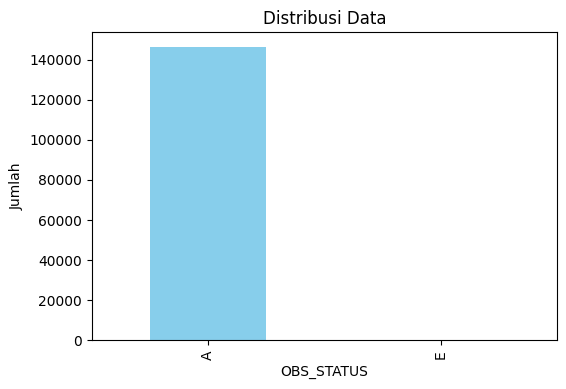

In [ ]:
# Visualisasi distribusi
plt.figure(figsize=(6, 4))
distribusi_data_sebelum.plot(kind='bar', color='skyblue')
plt.title('Distribusi Data')
plt.xlabel('OBS_STATUS')
plt.ylabel('Jumlah')
plt.show()

Dengan menggunakan kolom `OBS_STATUS` sebagai kolom target untuk memeriksa imbalance data dengan `value_counts()`. Dapat dilihat, terdapat ketidakseimbangan data antara `A` dan `E`. Dimana nilai `A` terdapat 146316 dan `E` terdapat 339.

Distribusi target setelah SMOTE:
OBS_STATUS
A    146316
E    146316
Name: count, dtype: int64


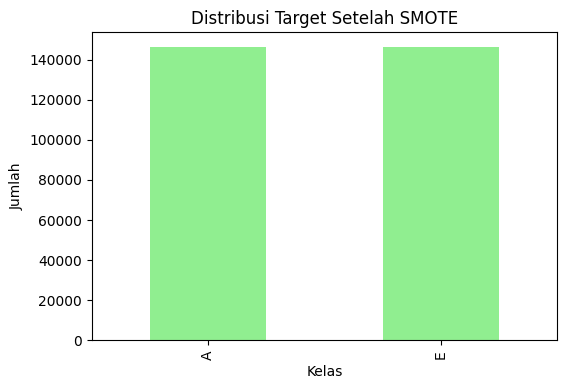

In [ ]:
# Memisahkan fitur dan target
X = df_cleaned_1.drop(columns=[kolom_target])
y = df_cleaned_1[kolom_target].astype(str)

# Mendapatkan index dari kolom kategorikal
kolom_kategorikal = X.select_dtypes(include=['object']).columns
index_kategorikal = [X.columns.get_loc(col) for col in kolom_kategorikal]

# Menggunakan SMOTENC untuk menangani imbalance tanpa encoding
smote_nc = SMOTENC(categorical_features=index_kategorikal, sampling_strategy='minority', random_state=42)
X_smote, y_smote = smote_nc.fit_resample(X, y)

# Menampilkan distribusi setelah SMOTE
distribusi_data_setelah = pd.Series(y_smote).value_counts()
print("Distribusi target setelah SMOTE:")
print(distribusi_data_setelah)

# Visualisasi distribusi setelah SMOTE
plt.figure(figsize=(6, 4))
distribusi_data_setelah.plot(kind='bar', color='lightgreen')
plt.title("Distribusi Target Setelah SMOTE")
plt.ylabel("Jumlah")
plt.xlabel("Kelas")
plt.show()

Menerapkan teknik SMOTENC (Synthetic Minority Oversampling Technique for Nominal and Continuous features) untuk menangani class imbalance, distribusi data target menjadi lebih seimbang. Teknik SMOTENC digunakan untuk menangani kolom kategorikal langsung tanpa perlu melakukan one-hot encoding.

Dengan menggunakan parameter berikut: `categorical_features` yaitu kolom kategorikal yang diproses langsung berdasarkan indeksnya tanpa encoding manual, menjaga struktur data kategori tetap utuh. Kemudian `sampling_strategy='minority'` untuk fokus pada peningkatan jumlah kelas minoritas (E) hingga proporsi yang lebih seimbang dibandingkan kelas mayoritas. Lalu `random_state=42` digunakan untuk menjamin hasil yang konsisten pada setiap proses.Kemudian, melakukan oversampling menggunakan `fit_resample()` untuk menghasilkan sample sintetis dari kelas minoritas berdasarkan data asli.

`X_smote` dan `y_smote` berisi fitur dan label dengan proporsi yang lebih seimbang antara `A` dan `E` setelah proses oversampling.

Distribusi data setelah dilakukan penanganan imbalance data dengan melakukan oversampling (SMOTENC) pada kolom `OBS_STATUS` yang awalnya `E` berjumlah 339 menjadi berjumlah 146316.

In [ ]:
# Mengonversi hasil SMOTE kembali ke DataFrame
df_bersih3 = pd.concat([pd.DataFrame(X_smote, columns=X.columns), pd.Series(y_smote, name=kolom_target)], axis=1)

# Menampilkan 5 baris pertama dari dataset hasil SMOTE
print("\nBeberapa baris pertama dari dataset hasil SMOTE:")
df_bersih3.head()


Beberapa baris pertama dari dataset hasil SMOTE:


,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,MEASURE,Measure,...,GDP_per_Capita_USD,Entity_y,Code_y,Primary energy consumption per GDP (kWh/$),Population_Density_people_per_km2,consumption CO2 per-capita,consumption-based CO2‚ emissions,production based CO2‚ emissions,Decimals.1,OBS_STATUS
0,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,CO2_PBEM,Production-based CO2 emissions,...,32834.3,Spain,ESP,1.014637,92.08,62.643.604,293601760,14087912000,Two,A
1,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,CO2_PBEM,Production-based CO2 emissions,...,32834.3,Spain,ESP,1.014637,92.08,62.643.604,293601760,14087912000,Two,A
2,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,CO2_PBEM,Production-based CO2 emissions,...,32834.3,Spain,ESP,1.014637,92.08,62.643.604,293601760,14087912000,Two,A
3,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,CO2_PBEM,Production-based CO2 emissions,...,32834.3,Spain,ESP,1.014637,92.08,62.643.604,293601760,14087912000,Two,A
4,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,CO2_PBEM,Production-based CO2 emissions,...,32834.3,Spain,ESP,1.014637,92.08,62.643.604,293601760,14087912000,Two,A


Distribusi data setelah dilakukan penanganan imbalance data dengan melakukan oversampling (SMOTE) pada kolom `OBS_STATUS` yang awalnya `E` berjumlah 6 menjadi berjumlah 145.

In [ ]:
# Periksa jumlah data sebelum dan sesudah penghapusan outlier
print("Jumlah data sebelum penghapusan outlier:", len(df_bersih3))

# Menggunakan metode IQR untuk penghapusan outlier jika masih ada
Q1 = df_bersih3['OBS_VALUE'].quantile(0.25)
Q3 = df_bersih3['OBS_VALUE'].quantile(0.75)
IQR = Q3 - Q1

# Menyaring data tanpa outlier
df_bersih3 = df_bersih3[(df_bersih3['OBS_VALUE'] >= Q1 - 1.5 * IQR) & (df_bersih3['OBS_VALUE'] <= Q3 + 1.5 * IQR)]

print("Jumlah data setelah penghapusan outlier:", len(df_bersih3))

Jumlah data sebelum penghapusan outlier: 292632
Jumlah data setelah penghapusan outlier: 245373


Melakukan pengecekan outlier kembali, untuk memastikan tidak adanya outlier dalam data.

In [ ]:
df_bersih3

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,MEASURE,Measure,...,GDP_per_Capita_USD,Entity_y,Code_y,Primary energy consumption per GDP (kWh/$),Population_Density_people_per_km2,consumption CO2 per-capita,consumption-based CO2‚ emissions,production based CO2‚ emissions,Decimals.1,OBS_STATUS
818,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,GHG_DBPROD_NNDI,Demand-based GHG productivity relative to disp...,...,32834.30,Spain,ESP,1.014637,92.08,62.643.604,293601760,14087912000,Two,A
819,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,GHG_DBPROD_NNDI,Demand-based GHG productivity relative to disp...,...,32834.30,Spain,ESP,1.014637,92.08,62.643.604,293601760,14087912000,Two,A
820,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,GHG_DBPROD_NNDI,Demand-based GHG productivity relative to disp...,...,32834.30,Spain,ESP,1.014637,92.08,62.643.604,293601760,14087912000,Two,A
821,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,GHG_DBPROD_NNDI,Demand-based GHG productivity relative to disp...,...,32834.30,Spain,ESP,1.014637,92.08,62.643.604,293601760,14087912000,Two,A
822,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,GHG_DBPROD_NNDI,Demand-based GHG productivity relative to disp...,...,32834.30,Spain,ESP,1.014637,92.08,62.643.604,293601760,14087912000,Two,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292627,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,GDP_PC,Value added,...,29674.54,Spain,ESP,0.979012,94.00,63.033.156,234657020,15282666000,Two,E
292628,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,GDP_PC,Value added,...,29674.54,Spain,ESP,0.979012,94.00,63.033.156,234657020,15282666000,Two,E
292629,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,GDP_PC,Value added,...,29674.54,Spain,ESP,0.979012,94.00,63.033.156,234657020,15282666000,Two,E
292630,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,ESP,Spain,A,Annual,GDP_PC,Value added,...,29674.54,Spain,ESP,0.979012,94.00,63.033.156,234657020,15282666000,Two,E


DataFrame yang telah dilakukan penanganan imbalance data disimpan di dalam `df_bersih3`

Pada `df_bersih3` dilakukan penggabungan hasil SMOTENC menjadi 1 DataFrame menggunakan `pd.concat()`. DataFrame ini berisi data yang sudah seimbang.

# 5. 5 Melakukan Features Encoding

In [ ]:
# Menampilkan kolom-kolom yang bersifat kategorikal di df_bersih3
kolom_kategorikal = df_bersih3.select_dtypes(include=['object', 'bool']).columns
kolom_kategorikal

Index(['STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'REF_AREA',
       'Reference area', 'FREQ', 'Frequency of observation', 'MEASURE',
       'Measure', 'UNIT_MEASURE', 'Unit of measure', 'ACTIVITY',
       'Economic activity', 'Observation status', 'Unit multiplier',
       'PRICE_BASE', 'Price base', 'Timeliness', 'Decimals', 'GDP', 'Pop._x',
       'Entity_x', 'Code_x', 'CO2 emisions', 'Pop._y', 'Share of World's',
       'Indicator ID', 'Indicator', 'Entity_y', 'Code_y',
       'consumption CO2 per-capita', 'Decimals.1', 'OBS_STATUS'],
      dtype='object')

**Penjelasan singkat kode:**

Kode di atas berfungsi untuk mengidentifikasi dan menampilkan semua kolom dalam DataFrame `df_bersih3` yang memiliki tipe data kategorikal. Dengan menggunakan metode `select_dtypes` dari `pandas`, kode ini menyaring kolom berdasarkan tipe data yang ditentukan, yaitu '`object`' dan '`bool`', yang mencakup kolom-kolom dengan nilai kategorikal. Hasil dari kode ini adalah daftar kolom yang bersifat kategorikal, yang disimpan dalam variabel `kolom_kategorikal`.

**Insight:**

Output menunjukkan bahwa terdapat 33 kolom yang memiliki sifat kategorikal di dalam DataFrame `df_bersih3`, termasuk berbagai ukuran emisi CO2, jenis aktivitas ekonomi, serta status pengamatan dan unit pengukuran. Kolom-kolom tersebut yang nantinya akan dilakukan encoding.

In [ ]:
# Membuat salinan DataFrame untuk menyimpan hasil encoding
df_label_encoded = df_bersih3.copy()

# Menginisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Melakukan encoding pada setiap kolom kategorikal
for kolom in kolom_kategorikal:
    df_label_encoded[kolom] = label_encoder.fit_transform(df_bersih3[kolom])

# Menampilkan dataframe setelah diencoding
df_label_encoded

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,MEASURE,Measure,...,GDP_per_Capita_USD,Entity_y,Code_y,Primary energy consumption per GDP (kWh/$),Population_Density_people_per_km2,consumption CO2 per-capita,consumption-based CO2‚ emissions,production based CO2‚ emissions,Decimals.1,OBS_STATUS
818,0,0,0,0,0,0,0,0,55,18,...,32834.30,0,0,1.014637,92.08,8,293601760,14087912000,1,0
819,0,0,0,0,0,0,0,0,55,18,...,32834.30,0,0,1.014637,92.08,8,293601760,14087912000,1,0
820,0,0,0,0,0,0,0,0,55,18,...,32834.30,0,0,1.014637,92.08,8,293601760,14087912000,1,0
821,0,0,0,0,0,0,0,0,55,18,...,32834.30,0,0,1.014637,92.08,8,293601760,14087912000,1,0
822,0,0,0,0,0,0,0,0,55,18,...,32834.30,0,0,1.014637,92.08,8,293601760,14087912000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292627,0,0,0,0,0,0,0,0,51,115,...,29674.54,0,0,0.979012,94.00,10,234657020,15282666000,1,1
292628,0,0,0,0,0,0,0,0,51,115,...,29674.54,0,0,0.979012,94.00,10,234657020,15282666000,1,1
292629,0,0,0,0,0,0,0,0,51,115,...,29674.54,0,0,0.979012,94.00,10,234657020,15282666000,1,1
292630,0,0,0,0,0,0,0,0,51,115,...,29674.54,0,0,0.979012,94.00,10,234657020,15282666000,1,1


In [ ]:
df_label_encoded.to_csv('cleaned_dataset.csv', index=False)

**Penjelasan singkat kode:**

Kode ini menggunakan LabelEncoder dari library `sklearn` untuk mengubah kolom-kolom kategorikal dalam DataFrame `df_bersih3` menjadi format numerik. Pertama, salinan dari DataFrame dibuat untuk menyimpan hasil encoding. Kemudian, `LabelEncoder` diinisialisasi dan digunakan untuk melakukan encoding pada setiap kolom kategorikal yang teridentifikasi sebelumnya. Setiap nilai kategorikal pada kolom tersebut diubah menjadi bilangan bulat yang merepresentasikan kategori yang bersangkutan. Akhirnya, DataFrame yang telah diencoding disimpan dalam `df_label_encoded`.

**Insight:**

Output menunjukkan bahwa setelah proses encoding, DataFrame yang baru (`df_label_encoded`) kini berisi kolom-kolom dengan nilai-nilai numerik yang merepresentasikan nilai-nilai kategorikal. Dengan penggantian nilai True/False atau kategori lain menjadi bilangan bulat `0` dan `1`, model machine learning dapat lebih mudah memahami dan memproses data ini.

In [ ]:
# Menampilkan informasi umum tentang df_label_encoded
df_label_encoded.info()

# Menampilkan statistik deskriptif dari df_label_encoded
df_label_encoded.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 245373 entries, 818 to 292631
Data columns (total 55 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   STRUCTURE                                        245373 non-null  int64  
 1   STRUCTURE_ID                                     245373 non-null  int64  
 2   STRUCTURE_NAME                                   245373 non-null  int64  
 3   ACTION                                           245373 non-null  int64  
 4   REF_AREA                                         245373 non-null  int64  
 5   Reference area                                   245373 non-null  int64  
 6   FREQ                                             245373 non-null  int64  
 7   Frequency of observation                         245373 non-null  int64  
 8   MEASURE                                          245373 non-null  int64  
 9   Measure           

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,MEASURE,Measure,...,GDP_per_Capita_USD,Entity_y,Code_y,Primary energy consumption per GDP (kWh/$),Population_Density_people_per_km2,consumption CO2 per-capita,consumption-based CO2‚ emissions,production based CO2‚ emissions,Decimals.1,OBS_STATUS
count,245373.0,245373.0,245373.0,245373.0,245373.0,245373.0,245373.0,245373.0,245373.000000,245373.000000,...,245373.000000,245373.0,245373.0,245373.000000,245373.000000,245373.000000,2.453730e+05,2.453730e+05,245373.000000,245373.00000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.913682,93.845806,...,30336.511109,0.0,0.0,1.015256,93.347805,5.520705,2.676338e+08,1.454664e+10,0.992045,0.59630
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.994084,33.835821,...,1484.119937,0.0,0.0,0.054034,0.845883,4.102366,2.573723e+07,9.440944e+08,0.088837,0.49064
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,26984.300000,0.0,0.0,0.961645,91.770000,0.000000,2.346570e+08,1.221598e+10,0.000000,0.00000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.000000,77.000000,...,29674.540000,0.0,0.0,0.979012,92.420000,1.000000,2.346570e+08,1.408791e+10,1.000000,0.00000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.000000,115.000000,...,30488.820000,0.0,0.0,0.992958,93.860000,6.000000,2.721842e+08,1.504801e+10,1.000000,1.00000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.000000,115.000000,...,30488.820000,0.0,0.0,1.014637,94.000000,10.000000,2.810175e+08,1.528267e+10,1.000000,1.00000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.000000,120.000000,...,35463.900000,0.0,0.0,1.149310,94.000000,11.000000,3.281901e+08,1.528267e+10,1.000000,1.00000


**Penjelasan singkat kode:**

Kode ini digunakan untuk menampilkan informasi umum dan statistik deskriptif dari DataFrame `df_label_encoded`. Dengan `df_label_encoded.info()`, kita mendapatkan ringkasan mengenai jumlah entri, jumlah kolom, tipe data, dan penggunaan memori dari DataFrame. Sementara itu, `df_label_encoded.describe()` memberikan statistik deskriptif yang mencakup jumlah, rata-rata, standar deviasi, nilai minimum, dan maksimum dari kolom-kolom numerik yang ada.

**Insight:**

Output menunjukkan bahwa DataFrame `df_label_encoded` memiliki 245373 entri dan 55 kolom, terdiri dari kolom bertipe `int64` dan `float64`. Statistik deskriptif mengungkapkan bahwa nilai pengamatan (`OBS_VALUE`) berkisar antara 0 hingga 145.24, dengan rata-rata 25.57 dan standar deviasi sebesar 25.29. Ini menunjukkan adanya variasi yang signifikan dalam nilai pengamatan. Selain itu, informasi terkait kolom kategorikal yang telah diencoding, terlihat pada nilai maksimum dan minimum dari kolom biner, memberikan wawasan tentang distribusi dan variasi data dalam dataset ini. Keberadaan 48 kolom bertipe `int64` menunjukkan bahwa sebagian besar fitur dalam dataset ini adalah variabel kategorikal yang telah diubah menjadi format numerik, yang dapat mempengaruhi analisis lebih lanjut dan pemodelan machine learning.

# C.2 Statistic for Data Science & Exploratory Data Analysis (EDA)

# 1 Mengelaborasi features dan tipe data (nominal, ordinal, numerical)

In [ ]:
# Mengelompokkan fitur berdasarkan tipe data # c2 & c3 nanti ganti pake df_bersih3
feature_types = {
    'Feature': [],
    'Type': []
}

# Mendefinisikan fitur ordinal
ordinal_features = []

# Menentukan tipe data untuk setiap kolom
for column in df_bersih3.columns:
    if df_bersih3[column].dtype in ['int64', 'float64']:
        feature_types['Feature'].append(column)
        feature_types['Type'].append('Numerical')
    elif df_bersih3[column].dtype == 'bool':
        feature_types['Feature'].append(column)
        feature_types['Type'].append('Nominal')
    else:
        unique_values = df_bersih3[column].unique()
        if len(unique_values) <= 10:  # Misalnya, jika ada <= 10 kategori
            feature_types['Feature'].append(column)
            feature_types['Type'].append('Nominal')
        else:
            feature_types['Feature'].append(column)
            feature_types['Type'].append('Ordinal')

# Mengubah hasil menjadi DataFrame untuk tampilan yang lebih baik
feature_df = pd.DataFrame(feature_types)

# Menghitung jumlah kolom berdasarkan tipe data
numerical_count = feature_df[feature_df['Type'] == 'Numerical'].shape[0]
nominal_count = feature_df[feature_df['Type'].isin(['Nominal'])].shape[0]
ordinal_count = feature_df[feature_df['Type'].isin(['Ordinal'])].shape[0]

# Menampilkan hasil
print("Jumlah Fitur berdasarkan Tipe Data:")
print(f"Numerical: {numerical_count}")
print(f"Nominal: {nominal_count}")
print(f"Ordinal: {ordinal_count}\n")

# Menampilkan DataFrame fitur
feature_df

Jumlah Fitur berdasarkan Tipe Data:
Numerical: 21
Nominal: 22
Ordinal: 12



,Feature,Type
0,STRUCTURE,Nominal
1,STRUCTURE_ID,Nominal
2,STRUCTURE_NAME,Nominal
3,ACTION,Nominal
4,REF_AREA,Nominal
5,Reference area,Nominal
6,FREQ,Nominal
7,Frequency of observation,Nominal
8,MEASURE,Ordinal
9,Measure,Ordinal


**Penjelasan singkat kode:**

Kode ini bertujuan untuk mengelompokkan fitur dalam DataFrame `df_bersih3` berdasarkan tipe data mereka. Proses dimulai dengan mendefinisikan dua kategori: fitur ordinal dan tipe data. Kemudian, setiap kolom dalam DataFrame diperiksa untuk menentukan apakah kolom tersebut bertipe numerik (`int64` atau `float64`), boolean, nominal, atau ordinal berdasarkan jumlah kategori yang ada. Hasilnya disimpan dalam DataFrame baru bernama `feature_df`, dan kemudian jumlah fitur berdasarkan tipe data (`Numerical`, `Nominal`, dan `Ordinal`) ditampilkan.

**Insight:**

Output menunjukkan bahwa terdapat 21 fitur dalam DataFrame `df_bersih3` yang dikategorikan sebagai tipe data **Numerik** dan 22 fitur sebagai **Nominal**, dengan 12 fitur **Ordinal**. Hal ini mengindikasikan bahwa dataset didominasi oleh variabel kategorikal (nominal), yang mungkin membutuhkan pengkodean fitur seperti **One Hot Encoding** atau **Label Encoding** untuk memudahkan pemrosesan lebih lanjut dalam analisis statistik (sudah dilakukan di C.1), pemodelan machine learning, atau analisis prediktif. Kehadiran beberapa fitur numerik memungkinkan aplikasi teknik analisis kuantitatif di samping penanganan variabel kategorikal.

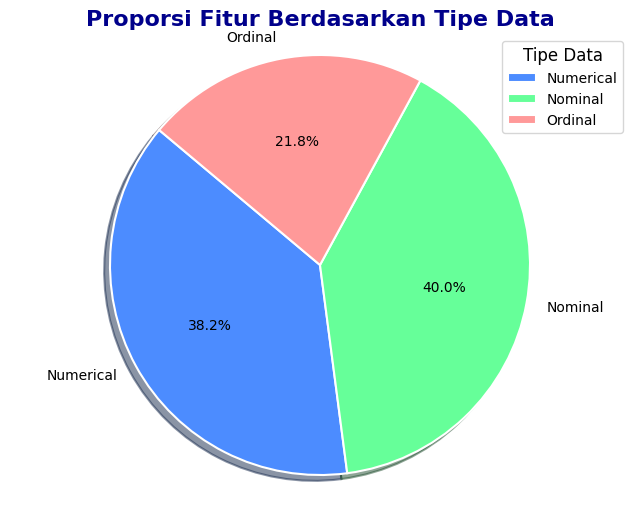

In [ ]:
# Menghitung jumlah kolom berdasarkan tipe data
counts = {
    'Type': ['Numerical', 'Nominal', 'Ordinal'],
    'Count': [numerical_count, nominal_count, ordinal_count]
}

# Membuat DataFrame dari counts
count_df = pd.DataFrame(counts)

# Warna untuk setiap tipe data dengan gradasi
colors = ['#4c8cff', '#66ff99', '#ff9999']

# Membuat diagram pie
plt.figure(figsize=(8, 6))
plt.pie(count_df['Count'],
        labels=count_df['Type'],
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        wedgeprops={'edgecolor': 'white', 'linewidth': 1.5},
        shadow=True)

# Menambahkan judul
plt.title('Proporsi Fitur Berdasarkan Tipe Data', fontsize=16, fontweight='bold', color='darkblue')

# Menampilkan diagram pie dengan proporsi yang lebih simetris
plt.axis('equal')

# Menambahkan legend
plt.legend(title='Tipe Data', loc='upper right', fontsize=10, title_fontsize='12')
plt.show()

**Penjelasan singkat kode:**

Kode di atas menghitung jumlah fitur berdasarkan tipe data (Numerical, Nominal, dan Ordinal) dan menyimpannya dalam sebuah DataFrame bernama `count_df`. Kemudian, kode ini membuat diagram pie untuk memvisualisasikan proporsi fitur berdasarkan tipe data. Diagram ini menunjukkan distribusi fitur dengan segmentasi yang jelas antara masing-masing tipe data. Setiap segmen dilengkapi dengan label yang menunjukkan jenis tipe data dan persentase kontribusinya terhadap total fitur.

**Insight:**

Dari diagram pie yang dihasilkan, terlihat bahwa terdapat 38.2% fitur yang tergolong sebagai data Numerical, 40% fitur sebagai data Nominal, dan 21.8% fitur yang teridentifikasi sebagai data Ordinal. Hal ini menunjukkan bahwa dataset ini didominasi oleh variabel kategorikal (Nominal), yang perlu dipertimbangkan dalam analisis lebih lanjut, seperti pengkodean fitur agar dapat digunakan dalam model machine learning dan analisis statistik.

# 2 Menjelaskan Kondisi dan Perbedaan Penggunaan Mean, Median, dan Modus

In [ ]:
print(df_bersih3.dtypes)

STRUCTURE                                           object
STRUCTURE_ID                                        object
STRUCTURE_NAME                                      object
ACTION                                              object
REF_AREA                                            object
Reference area                                      object
FREQ                                                object
Frequency of observation                            object
MEASURE                                             object
Measure                                             object
UNIT_MEASURE                                        object
Unit of measure                                     object
ACTIVITY                                            object
Economic activity                                   object
TIME_PERIOD                                          int64
OBS_VALUE                                          float64
Observation status                                  obje

In [ ]:
# Mean dari seluruh kolom numerik
mean_values = df_bersih3.mean(numeric_only=True)
print("Mean:\n", mean_values)

Mean:
 TIME_PERIOD                                        2.019013e+03
OBS_VALUE                                          2.557222e+01
UNIT_MULT                                          2.193395e-02
TIMELINESS                                         1.256858e+00
DECIMALS                                           1.992045e+00
Unnamed: 0                                         6.753177e+02
Year                                               2.019013e+03
GDP Nominal                                        1.387993e+12
GDP Real                                           1.247719e+12
GDP per capita                                     2.627366e+04
Population_x                                       4.748161e+07
Annual COâ_x0082__x0082_ emissions (per capita)    5.236561e+00
Fossil CO2                                         2.523300e+08
CO2 emissions                                      5.318809e+00
Population_y                                       4.748161e+07
Value                            

**Penjelasan singkat kode:**


*   Mean (rata-rata) dihitung untuk semua kolom numerik di dataset df_bersih3.
*   Fungsi mean() menghitung rata-rata dengan menjumlahkan semua nilai di kolom dan membaginya dengan jumlah data.

**Insight**:
Dari output, misalnya kolom OBS_VALUE memiliki mean sekitar 25.57 yang menunjukkan nilai rata-rata observasi.

Mean adalah jumlah total dari semua nilai dibagi dengan jumlah data. Mean cocok digunakan untuk data numerik dan memberikan informasi tentang nilai rata-rata keseluruhan.

*   Mean sangat sensitif terhadap nilai-nilai ekstrem atau outlier dalam data. Hal ini dapat menyebabkan estimasi yang bias atau tidak representatif dari data.
*   Mean dianggap sebagai ukuran pusat yang baik ketika data terdistribusi normal.

In [ ]:
# Median dari seluruh kolom numerik
median_values = df_bersih3.median(numeric_only=True)
print("Median:\n", median_values)

Median:
 TIME_PERIOD                                        2.021000e+03
OBS_VALUE                                          2.063513e+01
UNIT_MULT                                          0.000000e+00
TIMELINESS                                         1.000000e+00
DECIMALS                                           2.000000e+00
Unnamed: 0                                         8.170000e+02
Year                                               2.021000e+03
GDP Nominal                                        1.397510e+12
GDP Real                                           1.238780e+12
GDP per capita                                     2.595100e+04
Population_x                                       4.773566e+07
Annual COâ_x0082__x0082_ emissions (per capita)    5.164442e+00
Fossil CO2                                         2.543634e+08
CO2 emissions                                      5.320000e+00
Population_y                                       4.773566e+07
Value                          

**Penjelasan singkat kode:**


*   Median (nilai tengah) juga dihitung untuk kolom numerik di dataset.
*   Fungsi median() mengurutkan data dan mengambil nilai di tengah.



**Insight**:

Median sekitar 20.64 menunjukkan bahwa separuh data memiliki nilai OBS_VALUE di bawah angka ini, dan separuh lainnya di atas angka ini. Ini memberi gambaran tentang "titik tengah" distribusi data.


Median adalah nilai tengah dalam dataset ketika semua data diurutkan. Jika jumlah data ganjil, median adalah data yang berada di tengah. Jika jumlahnya genap, median adalah rata-rata dari dua data tengah.

*   Digunakan ketika data tidak terdistribusi secara normal atau ada outlier. Median lebih tahan terhadap outlier dibandingkan mean.
*   Cocok digunakan untuk data yang memiliki skewness atau data yang tidak simetris.



In [ ]:
# Modus dari setiap kolom
mode_values = df_bersih3.mode().iloc[0]  # Ambil modus pertama jika ada lebih dari satu modus
print("Modus:\n", mode_values)

Modus:
 STRUCTURE                                                                                   DATAFLOW
STRUCTURE_ID                                                OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)
STRUCTURE_NAME                                                                          Green Growth
ACTION                                                                                             I
REF_AREA                                                                                         ESP
Reference area                                                                                 Spain
FREQ                                                                                               A
Frequency of observation                                                                      Annual
MEASURE                                                                                       GDP_PC
Measure                                                                            

**Penjelasan singkat kode**:


*   Modus adalah nilai yang paling sering muncul di dataset.
*   Fungsi mode() mengembalikan satu atau lebih nilai yang sering muncul. iloc[0] dipakai untuk mengambil modus pertama jika ada lebih dari satu modus.



**Insight**:

OBS_VALUE memiliki modus sebesar 22.46, yang berarti nilai ini paling sering muncul di dalam dataset untuk kolom tersebut.

Modus adalah nilai yang paling sering muncul dalam dataset.
*   Sangat berguna untuk data kategorikal di mana kita ingin mengetahui kategori yang paling sering muncul.
*   Digunakan juga pada data numerik yang memiliki frekuensi berulang tinggi.



# 3 Menemukan dan Mendeskripsikan Statistical Five Summaries

In [ ]:
# Menampilkan statistik deskriptif
descriptive_stats = df_bersih3.describe()
print("Statistik Deskriptif:\n", descriptive_stats)

Statistik Deskriptif:
          TIME_PERIOD      OBS_VALUE      UNIT_MULT     TIMELINESS  \
count  245373.000000  245373.000000  245373.000000  245373.000000   
mean     2019.012622      25.572215       0.021934       1.256858   
std         3.742581      25.289535       0.362109       0.697390   
min      2010.000000      -5.350000       0.000000       0.000000   
25%      2017.000000       5.590000       0.000000       1.000000   
50%      2021.000000      20.635128       0.000000       1.000000   
75%      2022.000000      35.667966       0.000000       1.000000   
max      2022.000000     145.240000       6.000000       6.000000   

            DECIMALS     Unnamed: 0           Year   GDP Nominal  \
count  245373.000000  245373.000000  245373.000000  2.453730e+05   
mean        1.992045     675.317716    2019.012622  1.387993e+12   
std         0.088837     263.701836       3.742581  6.151564e+10   
min         1.000000       0.000000    2010.000000  1.196160e+12   
25%         2.0

**Penjelasan singkat kode**:


*   Kode df_bersih3.describe() digunakan untuk menampilkan statistik deskriptif dari dataset df_bersih3. Fungsi describe() memberikan ringkasan statistik dasar untuk setiap kolom numerik di dataset.
*   Statistik yang ditampilkan meliputi:

  count: Jumlah nilai yang valid (tidak null) di setiap kolom.

  mean: Rata-rata dari nilai di setiap kolom.

  std: Standar deviasi, yang mengukur seberapa tersebar data dari rata-rata.
  
  min: Nilai minimum.
  
  25% (kuartil pertama): Nilai di bawah 25% data.
  
  50% (median): Nilai tengah dari data.
  
  75% (kuartil ketiga): Nilai di bawah 75% data.
  
  max: Nilai maksimum.



**Insight**:

Dengan kode ini akan memudahkan kita dalam memahami karakteristik dasar dari setiap kolom numerik dalam dataset `df_bersih3`. Sebagai contoh, rata-rata waktu pengumpulan data berada di sekitar tahun 2021.
Nilai observasi (OBS_VALUE) bervariasi cukup besar dengan rata-rata sekitar 25.57 dan standar deviasi 25.29.

# 4 Mendeskripsikan distribusi data


# langkah- langkah

# 4.1 Memeriksa Statistik Deskriptif dari OBS_VALUE:

Menggunakan `describe()` untuk menampilkan statistik deskriptif dari kolom `OBS_VALUE`, termasuk count, mean, std, min, max, dan quartiles.



In [ ]:
print("Statistik Deskriptif dari OBS_VALUE:")
print(df_bersih3['OBS_VALUE'].describe())

Statistik Deskriptif dari OBS_VALUE:
count    245373.000000
mean         25.572215
std          25.289535
min          -5.350000
25%           5.590000
50%          20.635128
75%          35.667966
max         145.240000
Name: OBS_VALUE, dtype: float64


# 4.2 Memvisualisasikan Data Melalui Histogram,Boxplot,dan Density Curve

# Penjelasan singkat Kode :

Histogram:

1. Histogram :
 - Histogram dibuat untuk melihat distribusi nilai dari kolom `OBS_VALUE_LOG`, yang merupakan hasil transformasi logaritma natural dari kolom `OBS_VALUE`. Transformasi log dilakukan untuk mengurangi skewness data.

 - Histogram menggunakan 30 bins untuk membagi data ke dalam interval-interval, dengan tambahan kurva kepadatan (kde=True) untuk memperlihatkan pola distribusi secara halus.

 - Plot dilengkapi dengan judul, label pada sumbu x dan y, serta grid untuk memperjelas tampilannya.


2. Boxplot :

 - Boxplot digunakan untuk melihat distribusi data dari `OBS_VALUE_LOG` dan mendeteksi kemungkinan adanya outlier.

 - Boxplot menampilkan nilai minimum, kuartil, median, dan maksimum dari data yang telah ditransformasi log. Outlier, jika ada, ditampilkan sebagai titik di luar garis whiskers.

 - Plot ini juga dilengkapi dengan judul, label pada sumbu x, dan grid untuk memperjelas tampilannya.

3. Density Curve:

Kode di dibawah membuat sebuah fungsi untuk memplot kurva distribusi (density curve) dari data pada kolom `OBS_VALUE` dalam dataframe `df_bersih3`. Berikut adalah penjelasan singkat mengenai fungsi tersebut:

 - Definisi Fungsi:
 Fungsi `plot_density_with_components` menerima tiga parameter:
 `df_bersih3` (dataframe yang berisi data), `OBS_VALUE_LOG` (kolom yang akan diplot), `color` (warna untuk kurva distribusi.

 - `Plot KDE` (Kernel Density Estimation): Menggunakan sns.kdeplot untuk menggambar kurva distribusi (density curve) dari nilai-nilai dalam kolom `OBS_VALUE_LOG`. Warna dan bayangan diatur berdasarkan input parameter `color` dan `shade=True`.

 - Menghitung Mean dan Standar Deviasi: `mean_value` menyimpan nilai rata-rata dari kolom `OBS_VALUE_LOG`, sedangkan `std_value` menyimpan standar deviasinya.

 - Menambahkan Garis Rata-rata dan Garis Standar Deviasi: Garis putus-putus hitam `(axvline)` ditambahkan pada posisi rata-rata `(mean_value)`. Garis-garis abu-abu putus-putus (standar deviasi) ditambahkan pada ±1, ±2, dan ±3 kali standar deviasi dari rata-rata untuk menunjukkan sebaran data.

 - Tambahan Label dan Legend: Judul, label sumbu, dan legend ditambahkan untuk memperjelas plot.

 - Menampilkan Plot: `plt.show()` digunakan untuk menampilkan plot. Pada bagian akhir, fungsi ini dijalankan untuk membuat plot distribusi dari kolom `OBS_VALUE_LOG`dengan warna merah.








/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


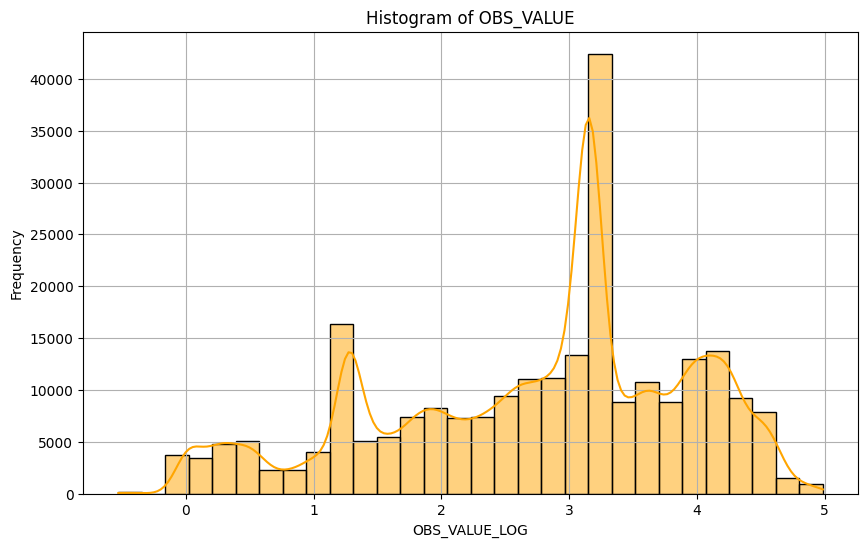

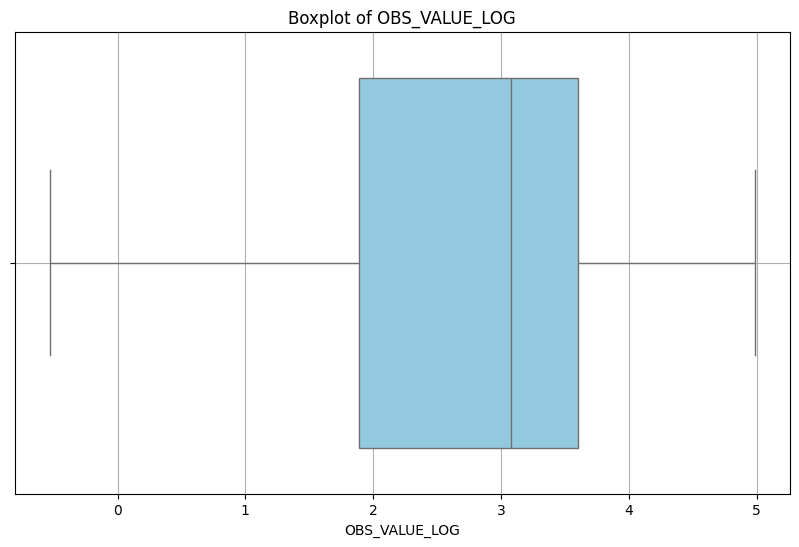

<ipython-input-43-67989d924f59>:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_bersih3[column], color=color, shade=True, label=f'Density of {column}')


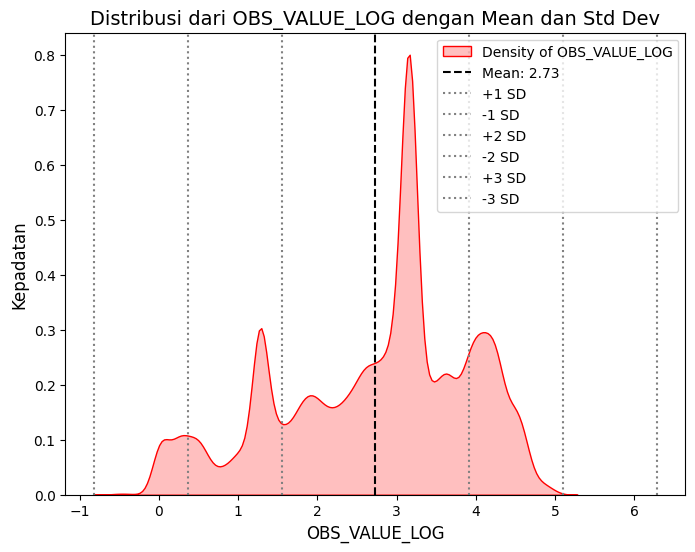

In [ ]:
df_bersih3['OBS_VALUE_LOG'] = np.log1p(df_bersih3['OBS_VALUE'])

# 5.1 Histogram
plt.figure(figsize=(10, 6))  # Mengatur ukuran plot
sns.histplot(df_bersih3['OBS_VALUE_LOG'], bins=30, kde=True, color='orange')  # Membuat histogram dengan 30 bins dan kurva kepadatan
plt.title("Histogram of OBS_VALUE")  # Menambahkan judul
plt.xlabel("OBS_VALUE_LOG")  # Label sumbu x
plt.ylabel("Frequency")  # Label sumbu y
plt.grid(True)  # Menambahkan grid untuk memperjelas plot
plt.show()  # Menampilkan plot

# 5.2 Boxplot
plt.figure(figsize=(10, 6))  # Mengatur ukuran plot
sns.boxplot(x=df_bersih3['OBS_VALUE_LOG'], color='skyblue')  # Membuat boxplot untuk melihat distribusi dan mendeteksi outlier
plt.title("Boxplot of OBS_VALUE_LOG")  # Menambahkan judul
plt.xlabel("OBS_VALUE_LOG")  # Label sumbu x
plt.grid(True)  # Menambahkan grid untuk memperjelas plot
plt.show()  # Menampilkan plot

# Density Curve
# Buat fungsi untuk plotting kurva distribusi (density curve) dengan komponen tambahan
def plot_density_with_components(df_bersih3, column, color):
    plt.figure(figsize=(8, 6))

    # Plot KDE untuk data yang telah ditransformasi log
    sns.kdeplot(df_bersih3[column], color=color, shade=True, label=f'Density of {column}')

    # Hitung rata-rata dan standar deviasi untuk data yang telah ditransformasi log
    mean_value = df_bersih3[column].mean()
    std_value = df_bersih3[column].std()

    # Plot garis rata-rata dan standar deviasi
    plt.axvline(mean_value, color='black', linestyle='--', label=f'Mean: {mean_value:.2f}')
    for i in range(1, 4):
        plt.axvline(mean_value + i * std_value, color='gray', linestyle=':', label=f'+{i} SD')
        plt.axvline(mean_value - i * std_value, color='gray', linestyle=':', label=f'-{i} SD')

    # Judul, label, dan legenda
    plt.title(f'Distribusi dari {column} dengan Mean dan Std Dev', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Kepadatan', fontsize=12)
    plt.legend(loc='upper right', fontsize=10)

    plt.show()

# Plot density dengan data yang telah ditransformasi log
plot_density_with_components(df_bersih3, 'OBS_VALUE_LOG', 'red')

# Interpretasi:

**Histogram**:
- Distribusi: Data `OBS_VALUE_LOG` menunjukkan pola distribusi yang tidak simetris, dengan puncak (mode) yang dominan di sekitar nilai 3. Distribusi ini memiliki bentuk multimodal, menunjukkan kemungkinan keberadaan beberapa kelompok atau subkelompok dalam dataset.

- Puncak: Puncak histogram terbesar berada di sekitar nilai 3, mengindikasikan bahwa banyak observasi memiliki nilai tersebut. Puncak lainnya yang lebih kecil di kisaran nilai 1 dan 4 menandakan kelompok data dengan karakteristik berbeda.

- Rentang: Nilai `OBS_VALUE_LOG` berkisar antara 0 hingga 5, dengan konsentrasi terbesar pada kisaran nilai 3.

- Variabilitas: Variasi data cukup luas, terlihat dari rentang nilai yang besar dan bentuk histogram yang kompleks, mencerminkan heterogenitas dalam data.


**Boxplot**:
- Distribusi: Boxplot mengonfirmasi bahwa data `OBS_VALUE_LOG` memiliki sebaran yang simetris tanpa outlier yang mencolok.
- Rentang: Sebagian besar data terkonsentrasi antara nilai sekitar 2 dan 3.5 (rentang antar kuartil).
- Variabilitas: Data memiliki variabilitas yang moderat, dengan jarak antar kuartil (IQR) cukup lebar.


**Komperhensif Density Curve**:

- Distribusi: Kurva distribusi menunjukkan bentuk yang mirip lonceng, tetapi dengan puncak utama di sekitar log 3 dan beberapa puncak kecil lainnya, mencerminkan data dengan beberapa cluster.

- Rata-rata (Mean): Rata-rata data berada di sekitar log 2.73, yang ditunjukkan oleh garis vertikal putus-putus hitam.

- Deviasi Standar (Standard Deviation): Garis abu-abu menunjukkan ±1, ±2, dan ±3 standar deviasi dari rata-rata. Sebagian besar data terkonsentrasi dalam rentang ±1 standar deviasi, sesuai pola distribusi.

- Rentang: Sebagian besar data terkonsentrasi antara nilai 2 hingga 4, dengan ekor distribusi yang lebih pendek ke arah 0 dan 5.


**Insight**:

Berdasarkan ketiga visualisasi data (histogram, box plot, dan density curve) untuk variabel `OBS_VALUE`, dapat disimpulkan bahwa:

- Distribusi: Data memiliki distribusi multimodal dengan beberapa klaster signifikan. Hal ini menunjukkan bahwa ada kemungkinan kelompok atau kategori dalam data yang memengaruhi pola distribusi. Puncak utama pada nilai logaritma 3 menunjukkan konsentrasi data tertinggi.

- Pusat Data: Nilai median sekitar 3 menunjukkan bahwa data sebagian besar terkonsentrasi di sekitar nilai tersebut, didukung oleh puncak utama pada histogram dan density curve.

- Variabilitas: Data memiliki variasi sedang, dengan rentang nilai yang cukup lebar dari 0 hingga 5. Namun, sebagian besar data terkonsentrasi di antara 2 hingga 4.

- Outlier: Tidak ditemukan outlier yang signifikan, sehingga data dapat digunakan untuk analisis lebih lanjut tanpa banyak pembersihan.





# 5. Menghitung Korelasi Antar-Fitur


# Langkah-langkah:

# 5.1 Periksa Tipe Data:
Pertama, kita perlu memeriksa tipe data dari setiap kolom untuk mengidentifikasi kolom mana yang bersifat numerik..

In [ ]:
print(df_bersih3.dtypes)

STRUCTURE                                           object
STRUCTURE_ID                                        object
STRUCTURE_NAME                                      object
ACTION                                              object
REF_AREA                                            object
Reference area                                      object
FREQ                                                object
Frequency of observation                            object
MEASURE                                             object
Measure                                             object
UNIT_MEASURE                                        object
Unit of measure                                     object
ACTIVITY                                            object
Economic activity                                   object
TIME_PERIOD                                          int64
OBS_VALUE                                          float64
Observation status                                  obje

# Penjelasan :
`df_bersih3.dtypes` memberikan tipe data dari setiap kolom dalam DataFrame, sehingga kita bisa mengetahui kolom mana yang merupakan kolom numerik dan mana yang bukan.

# 5.2.Pilih Hanya Kolom Numerik:

Setelah mengetahui tipe data, kita akan membuat DataFrame baru yang hanya berisi kolom-kolom numerik.

In [ ]:
# Memilih hanya kolom numerik
numerical_data = df_bersih3.select_dtypes(include=[np.number])

# Penjelasan:

    df_bersih3.select_dtypes(include=[np.number])

digunakan untuk memilih hanya kolom yang memiliki tipe data numerik. Ini memastikan bahwa saat kita menghitung korelasi, kita hanya menggunakan data yang relevan dan dapat dihitung.

# 5.3 Hitung Korelasi:
Selanjutnya, kita akan menghitung korelasi antar kolom dalam DataFrame numerik yang baru kita buat.

In [ ]:
# Menghitung korelasi antar fitur
correlation_matrix = numerical_data.corr()

# Menampilkan matriks korelasi
print(correlation_matrix)

                                                 TIME_PERIOD  OBS_VALUE  \
TIME_PERIOD                                         1.000000  -0.015825   
OBS_VALUE                                          -0.015825   1.000000   
UNIT_MULT                                          -0.052403   0.226100   
TIMELINESS                                         -0.422468  -0.053556   
DECIMALS                                            0.079340  -0.074608   
Unnamed: 0                                          0.998112  -0.017818   
Year                                                1.000000  -0.015825   
GDP Nominal                                         0.299560   0.018727   
GDP Real                                            0.730898  -0.045077   
GDP per capita                                      0.613827  -0.047896   
Population_x                                        0.904533  -0.010940   
Annual COâ_x0082__x0082_ emissions (per capita)    -0.813510  -0.018902   
Fossil CO2               

# Penjelasan:

    numerical_data.corr()
menghitung matriks korelasi untuk semua kolom numerik dalam DataFrame. Matriks ini menunjukkan seberapa kuat hubungan antara setiap pasangan fitur.

# 5.4 Visualisasi Korelasi dengan Heatmap:
Untuk memudahkan interpretasi, kita bisa menggunakan heatmap untuk menggambarkan matriks korelasi.

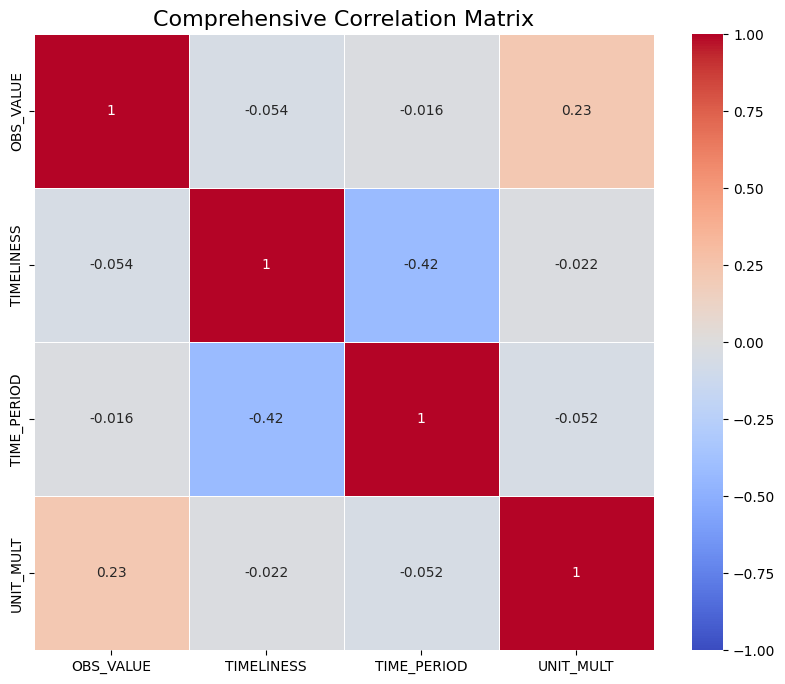


Korelasi tinggi (>|0.6|):
             OBS_VALUE  TIMELINESS  TIME_PERIOD  UNIT_MULT
OBS_VALUE          NaN         NaN          NaN        NaN
TIMELINESS         NaN         NaN          NaN        NaN
TIME_PERIOD        NaN         NaN          NaN        NaN
UNIT_MULT          NaN         NaN          NaN        NaN


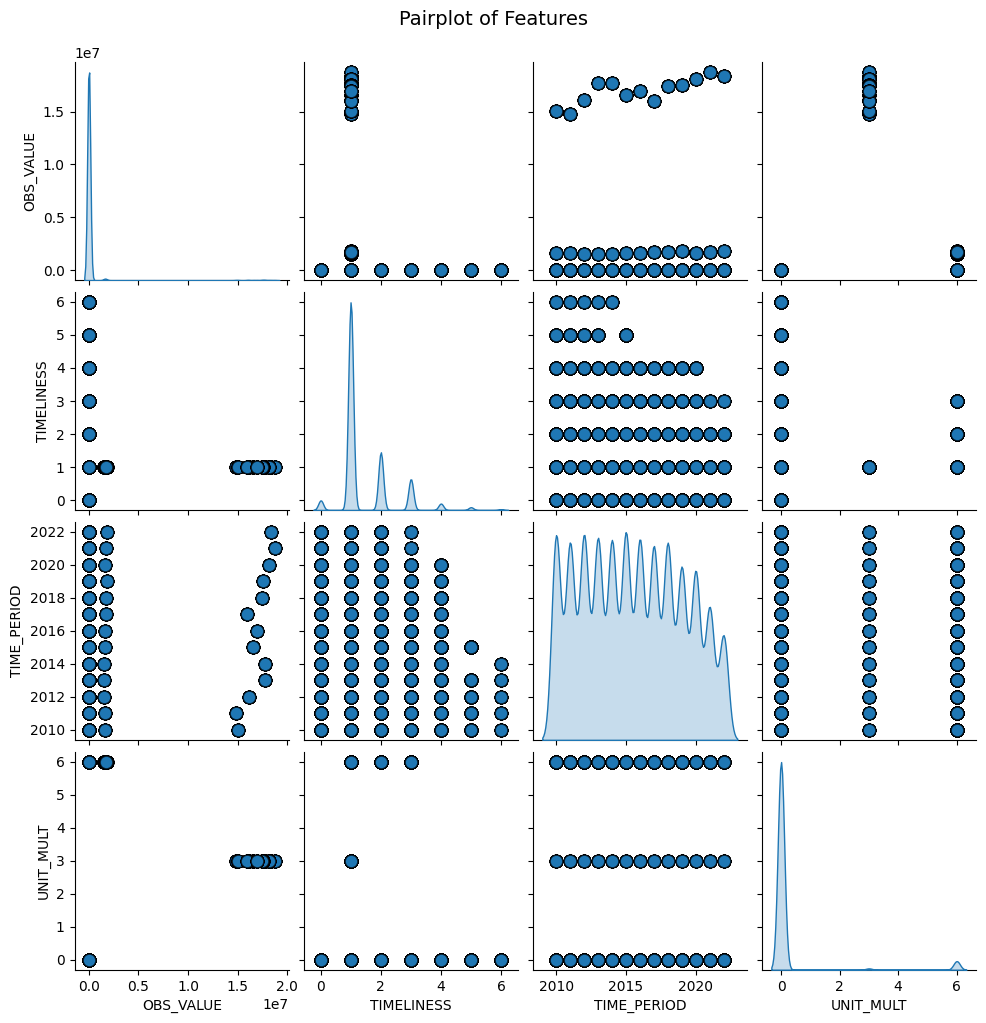

In [ ]:
# Fungsi untuk visualisasi korelasi yang lebih komprehensif
def plot_comprehensive_correlation(df_bersih3, features=None, corr_threshold=0.7):


    # Membuat matriks korelasi
    corr_matrix = df_label_encoded[features].corr()

    # Visualisasi korelasi menggunakan heatmap
    plt.figure(figsize=(10, 8))

    # Heatmap dengan annotasi dan skala warna
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5,
                vmin=-1, vmax=1, annot_kws={"size": 10})

    # Menambahkan judul
    plt.title("Comprehensive Correlation Matrix", fontsize=16)

    # Menampilkan heatmap
    plt.show()

    # Menyoroti korelasi tinggi
    high_corr = corr_matrix[(corr_matrix.abs() >= corr_threshold) & (corr_matrix != 1)]
    if not high_corr.empty:
        print(f"\nKorelasi tinggi (>|{corr_threshold}|):")
        print(high_corr)
    else:
        print(f"\nTidak ada korelasi di atas threshold {corr_threshold}")

    # Visualisasi lebih lanjut dengan Pairplot
    sns.pairplot(df[features], diag_kind='kde', plot_kws={'alpha':0.5, 's':80, 'edgecolor':'k'})
    plt.suptitle('Pairplot of Features', y=1.02, fontsize=14)
    plt.show()


# Panggil fungsi dengan seluruh fitur numerik
plot_comprehensive_correlation(df_label_encoded, features=['OBS_VALUE', 'TIMELINESS', 'TIME_PERIOD', 'UNIT_MULT'], corr_threshold=0.6)

# Penjelasan singkat kode:

- Fungsi `plot_comprehensive_correlation()`:
Fungsi untuk memvisualisasikan korelasi antar fitur dari dataset dengan heatmap dan pairplot, serta menyoroti korelasi tinggi berdasarkan threshold yang ditentukan.

- Matriks Korelasi & Heatmap:
Membuat matriks korelasi dengan `.corr()`. Visualisasinya dilakukan dengan heatmap berwarna coolwarm, menampilkan nilai korelasi di setiap sel.
Menyoroti Korelasi Tinggi:

- Korelasi yang melebihi threshold (0.6) disorot dan ditampilkan di konsol jika ada.

- Pairplot:
Menampilkan hubungan antar fitur menggunakan pairplot, dengan distribusi fitur pada diagonal plot.

- Panggilan Fungsi:
Fungsi dipanggil untuk fitur `['OBS_VALUE', 'TIMELINESS', 'TIME_PERIOD', 'UNIT_MULT']` dengan threshold korelasi 0.6.




# Insight

# Heatmap:

**Memahami Angka Korelasi **

Angka antara -1 hingga 1: Menunjukkan kekuatan dan arah hubungan antara dua variabel.

Angka mendekati 1: Korelasi positif yang kuat (semakin besar satu variabel, semakin besar variabel lainnya).

Angka mendekati -1: Korelasi negatif yang kuat (semakin besar satu variabel, semakin kecil variabel lainnya).

Angka mendekati 0: Tidak ada korelasi yang signifikan.

- TIMELINESS dan TIME_PERIOD memiliki korelasi positif yang sangat kuat (0.53): Ini berarti semakin tinggi nilai TIMELINESS, semakin tinggi pula nilai TIME_PERIOD. Kemungkinan besar, kedua variabel ini mengukur aspek yang serupa atau saling mempengaruhi secara signifikan.

- OBS_VALUE dan TIMELINESS memiliki korelasi negatif (-0.25): Artinya, semakin tinggi nilai OBS_VALUE, semakin rendah nilai TIMELINESS. Ini menunjukkan adanya hubungan terbalik antara kedua variabel.

- OBS_VALUE dan UNIT_MULT memiliki korelasi positif yang sangat lemah (0.13): Hubungan antara kedua variabel ini sangat minim, hampir tidak ada korelasi.

- UNIT_MULT dan TIMELINESS memiliki korelasi negatif yang sangat lemah (-0.036): Sama seperti sebelumnya, hubungan antara kedua variabel ini juga sangat lemah.
  

# Pairplot :

- OBS_VALUE:

Distribusi: Sebagian besar nilai OBS_VALUE terkonsentrasi di sekitar nilai yang rendah, dengan beberapa outlier yang sangat tinggi. Ini menunjukkan adanya variasi yang cukup besar dalam nilai OBS_VALUE.

Hubungan dengan variabel lain: OBS_VALUE tampaknya tidak memiliki korelasi yang kuat dengan variabel lainnya. Titik-titik data tersebar cukup acak pada plot yang melibatkan OBS_VALUE.

- TIMELINESS:

Distribusi: Sebagian besar nilai TIMELINESS terkonsentrasi di sekitar nilai yang rendah, dengan beberapa outlier yang lebih tinggi. Ini mengindikasikan bahwa sebagian besar data memiliki nilai TIMELINESS yang rendah.

Hubungan dengan variabel lain: TIMELINESS mungkin memiliki sedikit korelasi negatif dengan OBS_VALUE, tetapi hubungannya tidak begitu jelas.

- TIME_PERIOD:

Distribusi: Variabel TIME_PERIOD memiliki distribusi yang cukup merata, dengan beberapa titik data yang terkonsentrasi di tahun 2022.

Hubungan dengan variabel lain: TIME_PERIOD mungkin memiliki sedikit korelasi dengan beberapa variabel lainnya, tetapi hubungannya tidak begitu kuat.

- UNIT_MULT:

Distribusi: Sebagian besar nilai UNIT_MULT terkonsentrasi di sekitar nilai yang rendah, dengan beberapa outlier yang lebih tinggi.

Hubungan dengan variabel lain: UNIT_MULT tampaknya tidak memiliki korelasi yang kuat dengan variabel lainnya.





# C.3 Feature Engineering

In [ ]:
conditions = [
    (df_bersih3['TIMELINESS'] == 0),  # Tepat waktu
    (df_bersih3['TIMELINESS'] == 1),  # Sedikit terlambat
    (df_bersih3['TIMELINESS'] == 2)  # Sangat terlambat
]
choices = ['On-time', 'Slightly Late', 'Late']
df_bersih3['Timeliness_Category'] = np.select(conditions, choices, default='Unknown')
print(df_bersih3)

       STRUCTURE                              STRUCTURE_ID STRUCTURE_NAME  \
818     DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth   
819     DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth   
820     DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth   
821     DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth   
822     DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth   
...          ...                                       ...            ...   
292627  DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth   
292628  DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth   
292629  DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth   
292630  DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth   
292631  DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth   

       ACTION REF_AREA Reference area FREQ Frequency of observation  \
818 

#Insight
Menambah fitur `Timeliness_Category`

- On-time (0): Data yang dikumpulkan tepat waktu.

- Slightly Late (1): Data yang sedikit terlambat.

- Late (2): Data yang terlambat secara signifikan.

Analisis kinerja: Fitur ini membantu melihat seberapa sering data terlambat, penting untuk pengambilan keputusan.

Identifikasi Masalah:
Jika banyak data yang Slightly Late atau Late, ini menunjukkan perlunya perbaikan dalam proses pengumpulan data.

Penjelasan: Fitur `Timeliness_Category` memberi tahu kita tentang ketepatan waktu pengumpulan data. Ini penting untuk memastikan keputusan yang diambil berdasarkan data adalah yang terbaru dan paling relevan. Jika banyak data yang terlambat, kita perlu memperbaiki proses pengumpulan data agar lebih efisien.

In [ ]:
# Menggunakan kuantil untuk menentukan batas kategori.
batas_nilai = [
    df_bersih3['OBS_VALUE'].quantile(0.2),
    df_bersih3['OBS_VALUE'].quantile(0.4),
    df_bersih3['OBS_VALUE'].quantile(0.6),
    df_bersih3['OBS_VALUE'].quantile(0.8)
]

# Menentukan kondisi dan pilihan kategori
conditions_obs = [
    (df_bersih3['OBS_VALUE'] <= batas_nilai[0]),
    (df_bersih3['OBS_VALUE'] > batas_nilai[0]) & (df_bersih3['OBS_VALUE'] <= batas_nilai[1]),
    (df_bersih3['OBS_VALUE'] > batas_nilai[1]) & (df_bersih3['OBS_VALUE'] <= batas_nilai[2]),
    (df_bersih3['OBS_VALUE'] > batas_nilai[2]) & (df_bersih3['OBS_VALUE'] <= batas_nilai[3]),
    (df_bersih3['OBS_VALUE'] > batas_nilai[3])
]
choices_obs = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']

# Kolom OBS_VALUE_Category
df_bersih3['OBS_VALUE_Category'] = np.select(conditions_obs, choices_obs, default='unknown')
print(df_bersih3)

       STRUCTURE                              STRUCTURE_ID STRUCTURE_NAME  \
818     DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth   
819     DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth   
820     DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth   
821     DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth   
822     DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth   
...          ...                                       ...            ...   
292627  DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth   
292628  DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth   
292629  DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth   
292630  DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth   
292631  DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth   

       ACTION REF_AREA Reference area FREQ Frequency of observation  \
818 

# Insight
**Menambah fitur `OBS_Value_Category`**

Fitur `OBS_VALUE_Category` mengkategorikan nilai observasi `OBS_VALUE` ke dalam beberapa kelompok, seperti Very Low, Low, Moderate, High, Very High. Alasan mengapa membuat `OBS_VALUE` karena kategorisasi ini membantu dalam memahami  distribusi dan variasi nilai observasi, memudahkan analisis perbandingan antar  indikator, dan mengidentifikasi pola atau tren dalam data.

Insight:
- Dapat melihat sebaran nilai observasi di setiap kategori dan gambaran umum tentang besarnya nilai tiap indikator.
- Perbandingan Antar Indikator.
- Memudahkan perbandingan nilai observasi antar indikator. Misalnya, membandingkan kategori `OBS_VALUE` antara indikator emisi CO2 dengan indikator pertumbuhan ekonomi.
- Dapat menganalisis hubungan/korelasi antara kategori `OBS_VALUE`.

## **1. Tentukan machine learning model** (supervised learning(regression/classification)atau unsupervised learning) yang sesuai dengan dataset yang telah dipilih dengan problem understanding yang dilakukan sebelumnya.

- Membuat model Supervised Learning (Regression).


## 2. Sertakan **alasan penggunaan/pemilihan machine learning model** pada poin 1

**Alasan penggunaan Supervised Learning Model:**
- Karena dataset memiliki label target yang jelas, yaitu kolom `OBS_VALUE`. Karena kami memprediksi nilai ini berdasarkan fitur-fitur dari kolom `MEASURE` dan `Indicator ID` maka kami menggunakan Supervised Learning.
Supervised Learning digunakan karna memiliki fitur input (predictors) dan output (label target) yang diketahui dalam data latih. Dalam data ini, target (OBS_VALUE) adalah variabel yang ingin kami prediksi.

Berdasarkan karakteristik data dan tujuan prediksi, Supervised Learning dengan model regresi dipilih karena data memiliki target yang diketahui, dan tujuan kami adalah memprediksi nilai kontinu (OBS_VALUE). Model regresi ini (Random Forest Regression) dipilih karena mereka cocok untuk mengatasi masalah ini dan dapat dievaluasi dengan metrik standar regresi.

# Merging Data

In [ ]:
# Memastikan semua kolom yang dibutuhkan ada di data
assert {'MEASURE', 'Indicator ID', 'OBS_VALUE', 'Value', 'REF_AREA', 'TIME_PERIOD'}.issubset(df_bersih3.columns), \
    "Kolom yang dibutuhkan tidak lengkap di df_bersih3."

# Memfilter dataset berdasarkan 'MEASURE' dan 'Indicator ID' yang diinginkan
selected_measures = ['POPDEN', 'CO2_PBEMCAP', 'CO2_DBEMCAP', 'CO2_PBEM', 'GDP_PC', 'NRG_INT', 'GDP_RCAP', 'CO2_DBEM', 'ENVTAX_VEH', 'NRGC', 'PM_MOR', 'LTAX', 'ENVTAX']
selected_indicators = ['OWID.CB.co2', 'OWID.CB.consumption_co2', 'OWID.CB.consumption_co2_per_capita']

filtered_data_measure = df_bersih3[df_bersih3['MEASURE'].isin(selected_measures)]
filtered_data_indicator = df_bersih3[df_bersih3['Indicator ID'].isin(selected_indicators)]

pivot_data_measure = filtered_data_measure.pivot_table(index=['REF_AREA', 'TIME_PERIOD'],
                                                       columns='MEASURE',
                                                       values='OBS_VALUE').reset_index()

pivot_data_indicator = filtered_data_indicator.pivot_table(index=['REF_AREA', 'TIME_PERIOD'],
                                                           columns='Indicator ID',
                                                           values='Value').reset_index()

pivot_data = pd.merge(pivot_data_measure, pivot_data_indicator, on=['REF_AREA', 'TIME_PERIOD'], how='outer')


# Scaling

In [ ]:
columns_to_scale = ['POPDEN', 'CO2_PBEMCAP', 'CO2_DBEMCAP', 'CO2_PBEM',
                    'GDP_PC', 'NRG_INT', 'GDP_RCAP', 'CO2_DBEM',
                     'ENVTAX_VEH', 'NRGC', 'PM_MOR', 'LTAX', 'ENVTAX',
                    'OWID.CB.co2', 'OWID.CB.consumption_co2', 'OWID.CB.consumption_co2_per_capita']

# Menyaring kolom yang ada dalam data untuk menghindari kesalahan
columns_to_scale = [col for col in columns_to_scale if col in pivot_data.columns]

# Membuat salinan data untuk di-scale
scaled_data = pivot_data.copy()

# Melakukan scaling dengan Min-Max Scaler
scaler = MinMaxScaler()
scaled_data[columns_to_scale] = scaler.fit_transform(scaled_data[columns_to_scale])

# Feature Performance

Feature Performance:
                               Feature  Importance
1                          CO2_PBEMCAP    0.131526
6                             CO2_DBEM    0.123223
2                          CO2_DBEMCAP    0.097883
10                              ENVTAX    0.095524
13  OWID.CB.consumption_co2_per_capita    0.083589
3                             CO2_PBEM    0.078526
7                           ENVTAX_VEH    0.078362
12             OWID.CB.consumption_co2    0.064671
11                         OWID.CB.co2    0.063154
5                              NRG_INT    0.053824
14                         TIME_PERIOD    0.052838
9                                 LTAX    0.051746
0                               POPDEN    0.025089
8                                 NRGC    0.000044
4                               GDP_PC    0.000000


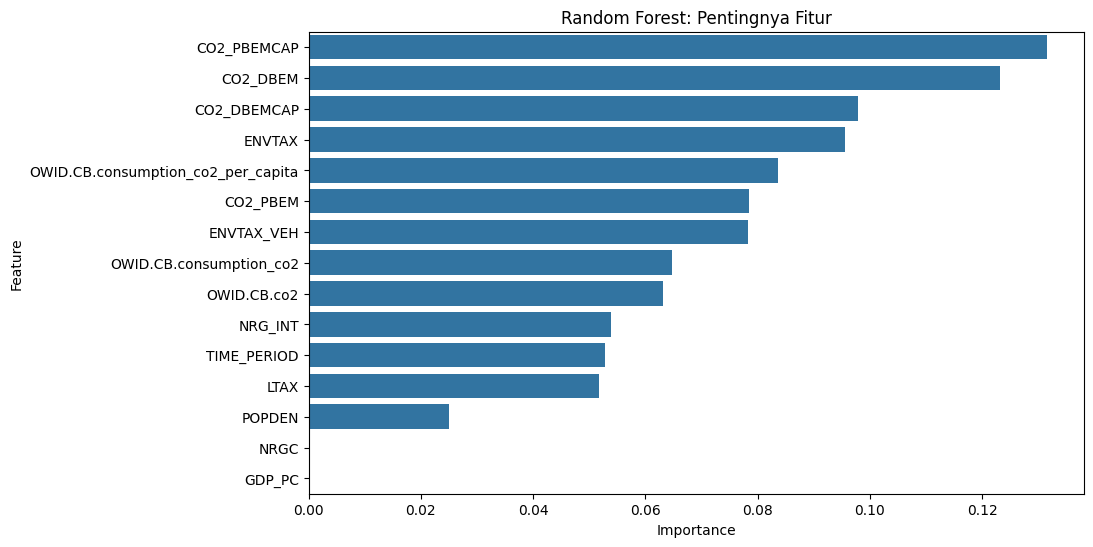

In [ ]:
# Daftar fitur yang diinginkan
features_to_use = [
    'POPDEN', 'CO2_PBEMCAP', 'CO2_DBEMCAP', 'CO2_PBEM', 'GDP_PC',
    'NRG_INT', 'CO2_DBEM', 'ENVTAX_VEH', 'NRGC', 'LTAX', 'ENVTAX',
    'OWID.CB.co2', 'OWID.CB.consumption_co2', 'OWID.CB.consumption_co2_per_capita', 'TIME_PERIOD'
]
features_to_use = [feature for feature in features_to_use if feature in pivot_data.columns]

# Subset data
X = pivot_data[features_to_use]
y = pivot_data['CO2_PBEMCAP']

# Menghapus nilai NaN
X = X.dropna()
y = y.loc[X.index]

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Menampilkan pentingnya fitur
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Performance:")
print(feature_importance_df)

# Visualisasi pentingnya fitur
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Random Forest: Pentingnya Fitur')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# VIF dan PCA

VIF

In [ ]:
# Menghitung VIF untuk Setiap Fitur
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns  # Menyimpan nama fitur
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Menampilkan hasil VIF
print(vif_data)

# Menyaring Fitur dengan VIF Tinggi
# Fitur dengan VIF lebih dari 10 umumnya dianggap memiliki multikolinieritas yang tinggi
high_vif_features = vif_data[vif_data['VIF'] > 10]
print("Fitur dengan VIF lebih dari 10:")
print(high_vif_features)

# Menghapus Fitur dengan VIF Tinggi dan Menghitung Ulang
# Jika Anda ingin menghapus fitur dengan VIF tinggi, misalnya fitur yang ada pada high_vif_features
X_reduced = X.drop(columns=high_vif_features['Feature'].tolist())

# Menghitung ulang VIF setelah menghapus fitur
vif_data_reduced = pd.DataFrame()
vif_data_reduced['Feature'] = X_reduced.columns
vif_data_reduced['VIF'] = [variance_inflation_factor(X_reduced.values, i) for i in range(X_reduced.shape[1])]

# Menampilkan hasil VIF yang telah diperbarui
print("Hasil VIF setelah penghapusan fitur dengan VIF tinggi:")
print(vif_data_reduced)


                               Feature  VIF
0                               POPDEN  inf
1                          CO2_PBEMCAP  inf
2                          CO2_DBEMCAP  inf
3                             CO2_PBEM  inf
4                               GDP_PC  inf
5                              NRG_INT  inf
6                             CO2_DBEM  inf
7                           ENVTAX_VEH  inf
8                                 NRGC  inf
9                                 LTAX  inf
10                              ENVTAX  inf
11                         OWID.CB.co2  inf
12             OWID.CB.consumption_co2  inf
13  OWID.CB.consumption_co2_per_capita  inf
14                         TIME_PERIOD  inf
Fitur dengan VIF lebih dari 10:
                               Feature  VIF
0                               POPDEN  inf
1                          CO2_PBEMCAP  inf
2                          CO2_DBEMCAP  inf
3                             CO2_PBEM  inf
4                               GDP_PC  inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Nilai VIF ini sangat jauh di atas ambang batas 10 yang biasanya digunakan untuk menandakan adanya multikolinieritas, dan ini menunjukkan bahwa fitur-fitur ini sangat berkorelasi satu sama lain.

Salah satu cara untuk mengatasi multikolinieritas adalah dengan mengurangi dimensi menggunakan teknik seperti Principal Component Analysis (PCA). PCA dapat menggabungkan fitur-fitur yang berkorelasi menjadi beberapa komponen utama yang saling tidak berkorelasi, sehingga mengurangi masalah multikolinieritas.

PCA

In [ ]:
# Langkah 1: Standarisasi Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Mengaplikasikan standar skala pada fitur

# Langkah 2: Terapkan PCA
pca = PCA(n_components=2)  # Tentukan jumlah komponen utama yang ingin Anda gunakan
X_pca = pca.fit_transform(X_scaled)

# Langkah 3: Memeriksa proporsi varians yang dijelaskan oleh setiap komponen
print(pca.explained_variance_ratio_)

# Langkah 4: Melihat data yang telah diproyeksikan ke komponen utama
print(pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])]))

[0.68307482 0.14302009]
        PC1       PC2
0  4.682696  0.901858
1  4.755420 -0.004448
2  2.304768  0.998920
3 -3.367758  1.092150
4 -3.349602  1.196420
5 -1.966345 -1.448924
6 -3.120983  0.331922
7  0.177928 -3.360087
8 -0.116124  0.292190


Variance Explained:


*   PC1 (Komponen Utama 1) menjelaskan sekitar 90.6% dari varians dalam data.
*   PC2 (Komponen Utama 2) menjelaskan sekitar 6.7% dari varians.

Ini berarti bahwa komponen pertama (PC1) hampir sepenuhnya mencakup informasi yang ada dalam dataset, sementara komponen kedua (PC2) hanya memberikan kontribusi kecil.
Dengan hasil PCA ini, dapat mengurangi dimensi data dan menangani multikolinieritas.

# Model Random Forest Regressor

In [ ]:
# Memfilter dataset berdasarkan 'MEASURE' dan 'Indicator ID' yang diinginkan
selected_measures_rfr = ['POPDEN', 'CO2_PBEMCAP', 'CO2_DBEMCAP', 'CO2_PBEM', 'GDP_PC', 'NRG_INT', 'GDP_RCAP', 'CO2_DBEM', 'ENVTAX', 'LTAX', 'ENVTAX_VEH']
selected_indicators_rfr = ['OWID.CB.co2', 'OWID.CB.consumption_co2', 'OWID.CB.consumption_co2_per_capita']

# Memfilter data berdasarkan 'MEASURE'
filtered_data_measure_rfr = df_bersih3[df_bersih3['MEASURE'].isin(selected_measures_rfr)]

# Memfilter data berdasarkan 'Indicator ID'
filtered_data_indicator_rfr = df_bersih3[df_bersih3['Indicator ID'].isin(selected_indicators_rfr)]

# Melakukan pivot pada data berdasarkan MEASURE
pivot_data_measure_rfr = filtered_data_measure_rfr.pivot_table(index=['REF_AREA', 'TIME_PERIOD'],
                                                               columns='MEASURE',
                                                               values='OBS_VALUE').reset_index()

# Melakukan pivot pada data berdasarkan Indicator ID
pivot_data_indicator_rfr = filtered_data_indicator_rfr.pivot_table(index=['REF_AREA', 'TIME_PERIOD'],
                                                                   columns='Indicator ID',
                                                                   values='Value').reset_index()

# Gabungkan hasil pivot dari MEASURE dan Indicator ID berdasarkan REF_AREA dan TIME_PERIOD
pivot_data_rfr = pd.merge(pivot_data_measure_rfr, pivot_data_indicator_rfr, on=['REF_AREA', 'TIME_PERIOD'], how='outer')

# Menghapus nilai NaN pada kolom target
pivot_data_rfr = pivot_data_rfr.dropna(subset=['CO2_PBEMCAP'])

# Menentukan fitur dan target (X dan y)
X_rfr = pivot_data_rfr[['NRG_INT', 'CO2_PBEM', 'CO2_DBEM', 'ENVTAX_VEH', 'ENVTAX', 'LTAX', 'CO2_DBEMCAP',
                        'OWID.CB.co2', 'OWID.CB.consumption_co2', 'OWID.CB.consumption_co2_per_capita', 'TIME_PERIOD']]
y_rfr = pivot_data_rfr[['CO2_PBEMCAP']]

# Membagi dataset menjadi data latih dan data uji dengan rasio 80:20
X_train_rfr, X_test_rfr, y_train_rfr, y_test_rfr = train_test_split(X_rfr, y_rfr, test_size=0.2, random_state=42)

# Menginisialisasi scaler dan menerapkan scaling pada data latih dan data uji
scaler_rfr = StandardScaler()
X_train_scaled_rfr = scaler_rfr.fit_transform(X_train_rfr)
X_test_scaled_rfr = scaler_rfr.transform(X_test_rfr)

# Menginisialisasi model RandomForestRegressor
model_rfr = RandomForestRegressor(random_state=42)

# Melatih model menggunakan data latih
model_rfr.fit(X_train_scaled_rfr, y_train_rfr.values.ravel())

# Melakukan prediksi pada data uji
y_pred_rfr = model_rfr.predict(X_test_scaled_rfr)

# Menghitung Mean Absolute Error (MAE), Mean Squared Error (MSE), dan Root Mean Squared Error (RMSE)
mae_rfr = mean_absolute_error(y_test_rfr, y_pred_rfr)
mse_rfr = mean_squared_error(y_test_rfr, y_pred_rfr)
rmse_rfr = np.sqrt(mse_rfr)
r2_rfr = r2_score(y_test_rfr, y_pred_rfr)

# Menampilkan hasil evaluasi model
print(f"Mean Absolute Error (MAE): {mae_rfr}")
print(f"Mean Squared Error (MSE): {mse_rfr}")
print(f"Root Mean Squared Error (RMSE): {rmse_rfr}")
print(f"R² score: {r2_rfr}")

Mean Absolute Error (MAE): 0.10719999999999856
Mean Squared Error (MSE): 0.017241446666666303
Root Mean Squared Error (RMSE): 0.13130668934470285
R² score: 0.9267153017852099


**Insight:**

* Model RandomForestRegressor dipilih karena kekuatannya dalam menangani dataset yang kompleks dan kemampuannya untuk menangkap interaksi antar-fitur secara otomatis. Dalam kasus ini, model digunakan untuk memprediksi nilai OBS_VALUE berdasarkan fitur numerik dan boolean yang tersaring dari dataset.
* Hasil evaluasi dengan skor R2 sebesar 0.867 menunjukkan bahwa model dapat menjelaskan sekitar 86.7% variasi dalam data, yang menunjukkan performa prediktif yang sangat baik. Selain itu, nilai Mean Squared Error (MSE) sebesar 0.031 dan Root Mean Squared Error (RMSE) sebesar 0.177 menunjukkan bahwa kesalahan prediksi secara keseluruhan rendah. Sedangkan, Mean Absolute Error (MAE) sebesar 0.148 menunjukkan bahwa rata-rata kesalahan prediksi dalam satuan data cukup kecil.
* Penggunaan metode split data (80% pelatihan dan 20% pengujian) serta penetapan random_state memungkinkan hasil yang konsisten, namun performa bisa ditingkatkan dengan hyperparameter tuning atau menggunakan model yang lebih kompleks jika diperlukan.

**Penjelasan Singkat:**

* Dataset dibersihkan dengan menghapus kolom yang tidak relevan dan memilih hanya kolom numerik dan boolean.
* Kolom boolean dikonversi ke integer agar kompatibel dengan model.
* Data kemudian dibagi menjadi data pelatihan dan pengujian dengan proporsi 80% untuk pelatihan dan 20% untuk pengujian.
* Model RandomForestRegressor diinisialisasi dan dilatih dengan data pelatihan.
* Setelah pelatihan, model diuji pada data pengujian dan dievaluasi menggunakan beberapa metrik: MSE sebesar 0.031, menunjukkan kesalahan kuadrat rata-rata yang kecil; RMSE sebesar 0.177, dan R² score sebesar 0.867, yang mengindikasikan performa prediksi yang sangat baik. (nilai R² = 1 adalah sempurna).

# Perbandingan Data Aktual dengan Data Prediction

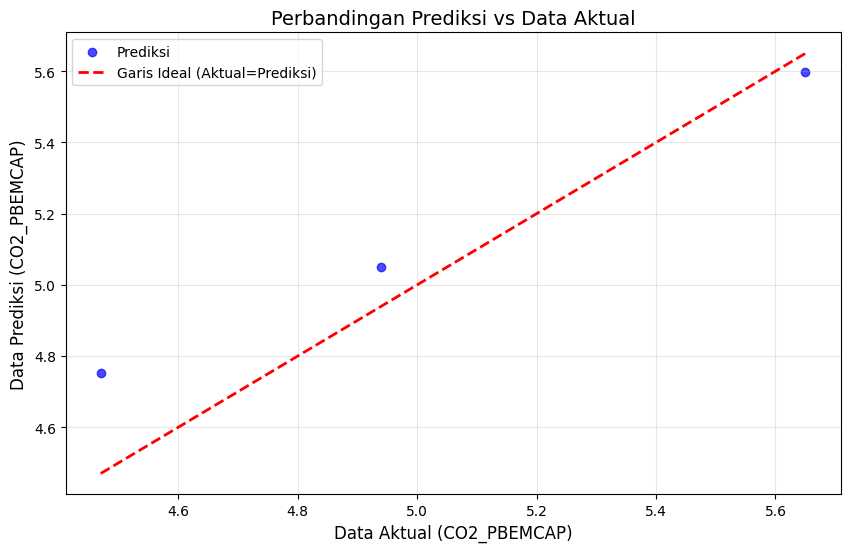

In [ ]:
df3 = y_test_rfr.copy()
df3['Prediction'] = y_pred_rfr

# Plot data aktual vs prediksi
plt.figure(figsize=(10, 6))
plt.scatter(df3['CO2_PBEMCAP'], df3['Prediction'], alpha=0.7, color='b', label='Prediksi')
plt.plot([df3['CO2_PBEMCAP'].min(), df3['CO2_PBEMCAP'].max()],
         [df3['CO2_PBEMCAP'].min(), df3['CO2_PBEMCAP'].max()],
         color='r', lw=2, linestyle='--', label='Garis Ideal (Aktual=Prediksi)')

# Menambahkan label dan judul
plt.title("Perbandingan Prediksi vs Data Aktual", fontsize=14)
plt.xlabel("Data Aktual (CO2_PBEMCAP)", fontsize=12)
plt.ylabel("Data Prediksi (CO2_PBEMCAP)", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

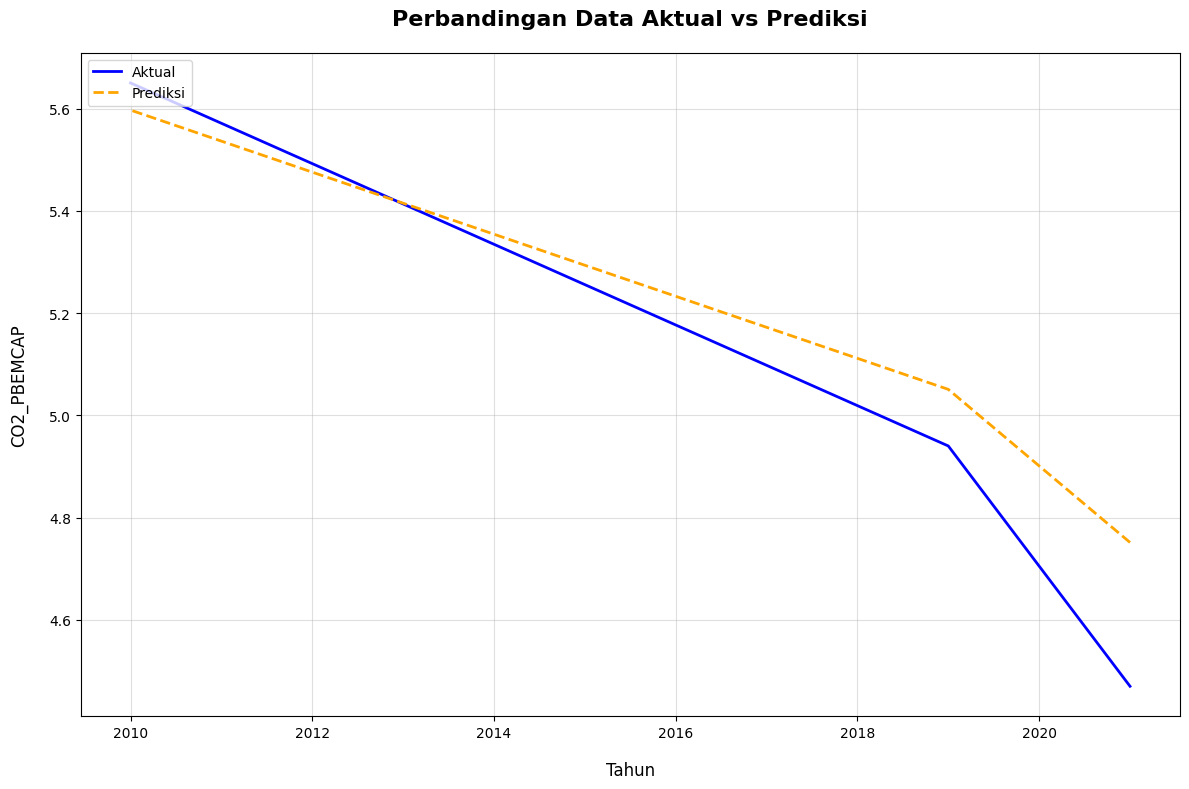

In [ ]:
# Menyalin data y_test ke DataFrame baru dan tambahkan kolom prediksi
df3 = y_test_rfr.copy()
df3.reset_index(drop=True, inplace=True)
df3['Prediction'] = y_pred_rfr

# Memastikan kolom TIME_PERIOD ada di pivot_data dan tambahkan ke df3
if 'TIME_PERIOD' in pivot_data.columns:
    # Ambil TIME_PERIOD berdasarkan index y_test
    df3['TIME_PERIOD'] = pivot_data['TIME_PERIOD'].iloc[y_test_rfr.index].values
else:
    print("Kolom 'TIME_PERIOD' tidak ditemukan di pivot_data.")
    df3['TIME_PERIOD'] = range(len(df3))

plt.figure(figsize=(12, 8))

# Plot data aktual
plt.plot(df3['TIME_PERIOD'], df3['CO2_PBEMCAP'], label='Aktual', color='blue', linewidth=2)

# Plot data prediksi
plt.plot(df3['TIME_PERIOD'], df3['Prediction'], label='Prediksi', color='orange', linewidth=2, linestyle='--')

plt.title("Perbandingan Data Aktual vs Prediksi", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Tahun", fontsize=12, labelpad=15)
plt.ylabel("CO2_PBEMCAP", fontsize=12, labelpad=15)
plt.legend(fontsize=10, loc='upper left')

# Grid untuk membantu pembacaan
plt.grid(alpha=0.4)

plt.tight_layout()
plt.show()

Model KNN

In [ ]:
# Menghapus baris dengan nilai NaN pada fitur dan target
pivot_data_cleaned = pivot_data.dropna(subset=['POPDEN', 'CO2_PBEMCAP', 'CO2_DBEMCAP', 'CO2_PBEM', 'GDP_PC', 'NRG_INT', 'CO2_DBEM', 'ENVTAX', 'LTAX', 'ENVTAX_VEH',
                                               'OWID.CB.co2', 'OWID.CB.consumption_co2', 'OWID.CB.consumption_co2_per_capita'])

# Menentukan fitur dan target (X dan y)
X = pivot_data_cleaned[['NRG_INT', 'CO2_PBEM', 'CO2_DBEM', 'ENVTAX_VEH', 'ENVTAX', 'LTAX', 'CO2_DBEMCAP',
                        'OWID.CB.co2', 'OWID.CB.consumption_co2', 'OWID.CB.consumption_co2_per_capita']]
y = pivot_data_cleaned['CO2_PBEMCAP']

# Membagi dataset menjadi data latih dan data uji dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menginisialisasi scaler dan menerapkan scaling pada data latih dan data uji
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inisialisasi model KNN dengan n_neighbors = 5
knn_model = KNeighborsRegressor(n_neighbors=5)

# Melatih model KNN menggunakan data latih
knn_model.fit(X_train_scaled, y_train)

# Melakukan prediksi pada data uji menggunakan model KNN
y_pred_knn = knn_model.predict(X_test_scaled)

# Menghitung evaluasi model KNN
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Menampilkan hasil evaluasi model KNN
print(f"KNN - Mean Absolute Error (MAE): {mae_knn}")
print(f"KNN - Mean Squared Error (MSE): {mse_knn}")
print(f"KNN - Root Mean Squared Error (RMSE): {rmse_knn}")
print(f"KNN - R² score: {r2_knn}")


KNN - Mean Absolute Error (MAE): 0.2570000000000001
KNN - Mean Squared Error (MSE): 0.06845000000000005
KNN - Root Mean Squared Error (RMSE): 0.2616295090390227
KNN - R² score: -5.8449999999999935


**Insight**:

*   MAE (0.257) dan RMSE (0.262) menunjukkan rata-rata kesalahan prediksi model cukup kecil, artinya prediksi model mendekati nilai sebenarnya.
*   R² (-5.845) menunjukkan model sangat buruk dalam menjelaskan pola data

Kesimpulan: Meski kesalahan prediksi terlihat kecil, performa buruk R² menunjukkan bahwa model tidak memahami pola data dengan baik.


**Penjelasan singkat**:

Kode ini melatih model KNN untuk memprediksi CO2_PBEMCAP menggunakan data yang sudah dibersihkan dan diskalakan. Dataset dibagi menjadi data latih (80%) dan uji (20%), lalu model dievaluasi menggunakan metrik MAE, MSE, RMSE, dan R². Hasil evaluasi digunakan untuk menilai performa prediksi model KNN.



## 4. **Lakukan cross-validation basic** dari machine learning model yang telah dibuat sebelumnya

In [ ]:
# Menginisialisasi model RandomForestRegressor
model_rfr = RandomForestRegressor(random_state=42)

# Inisialisasi KFold dengan 5 fold
kf_rfr = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation dengan menghitung fit_time dan neg_mean_squared_error
cv_results_rfr = cross_validate(
    model_rfr,
    X_train_rfr,
    y_train_rfr.values.ravel(),
    cv=kf_rfr,
    scoring='neg_mean_squared_error',
    return_train_score=False,
    n_jobs=-1
)

# Menghitung RMSE dari neg_mean_squared_error
cv_rmse_rfr = np.sqrt(-cv_results_rfr['test_score'])  # RMSE untuk setiap fold
cv_rmse_mean_rfr = np.mean(cv_rmse_rfr)  # RMSE rata-rata
cv_fit_time_rfr = cv_results_rfr['fit_time']  # Waktu pelatihan untuk setiap fold

# Menampilkan hasil
print("Cross-Validation Results:")
for i, (fit_time, rmse) in enumerate(zip(cv_fit_time_rfr, cv_rmse_rfr), 1):
    print(f"  Fold {i}: Fit Time = {fit_time:.4f}s, RMSE = {rmse:.4f}")

print(f"\nCross-Validation RMSE rata-rata: {cv_rmse_mean_rfr:.4f}")
print(f"Rata-rata Fit Time: {np.mean(cv_fit_time_rfr):.4f}s")


Cross-Validation Results:
  Fold 1: Fit Time = 0.3131s, RMSE = 0.0719
  Fold 2: Fit Time = 0.2649s, RMSE = 0.1200
  Fold 3: Fit Time = 0.4232s, RMSE = 0.5746
  Fold 4: Fit Time = 0.2553s, RMSE = 0.4202
  Fold 5: Fit Time = 0.2723s, RMSE = 0.3265

Cross-Validation RMSE rata-rata: 0.3026
Rata-rata Fit Time: 0.3058s


**Penjelasan singkat kode:**

* `RandomForestRegressor` : Model RandomForestRegressor diinisialisasi untuk melakukan prediksi. Model ini dipilih karena kemampuannya dalam menangani data yang kompleks serta menangkap interaksi antara fitur-fitur secara otomatis.
* `KFold` : Inisialisasi objek KFold dengan 5 fold (n_splits=5) untuk melakukan cross-validation, dengan pengacakan (shuffle=True) dan random_state untuk hasil yang konsisten. KFold ini akan membagi data pelatihan menjadi 5 subset yang berbeda, sehingga setiap subset akan bergiliran menjadi data validasi sementara sisanya sebagai data pelatihan.
* `cross_val_score`: Melakukan cross-validation pada model dengan metrik evaluasi MSE yang dinyatakan sebagai nilai negatif (scoring='neg_mean_squared_error'). Setiap nilai MSE negatif ini dikonversi menjadi RMSE untuk setiap fold dengan mengambil nilai absolut, lalu mengakarnya.
* `Menghitung RMSE` : Konversi nilai MSE menjadi RMSE untuk setiap fold untuk mendapatkan interpretasi yang lebih mudah. RMSE untuk setiap fold dicetak, dan RMSE rata-rata dihitung sebagai ukuran performa keseluruhan dari cross-validation.

**Insight:**

1. Cross-validation dilakukan untuk mengevaluasi performa model secara menyeluruh dan untuk memastikan hasil prediksi tidak bergantung pada satu set data tertentu. Dengan 5 fold, data pelatihan dibagi menjadi 5 subset yang bergantian menjadi data validasi. Ini membantu mengurangi potensi overfitting dan memberikan estimasi yang lebih realistis tentang performa model di data yang belum pernah dilihat.

2. Hasil Cross-Validation menunjukkan variasi RMSE yang cukup besar di setiap fold, dengan RMSE berkisar antara 0.0719 hingga 0.5746, dan RMSE rata-rata sebesar 0.3026. Variasi ini menunjukkan bahwa model mungkin mengalami kesulitan dalam menangkap pola yang konsisten di seluruh subset data, yang mengindikasikan adanya variabilitas dalam performa prediksi model.

3. Nilai RMSE rata-rata sebesar 0.3026 pada cross-validation sedikit lebih tinggi dibandingkan RMSE pada data pengujian awal (0.177), yang menunjukkan bahwa model mungkin sedikit overfitting pada data pelatihan. Hal ini bisa disebabkan oleh variabilitas yang tinggi dalam data atau adanya fitur yang perlu dieksplorasi lebih lanjut. Oleh karena itu, untuk meningkatkan performa model, disarankan untuk melakukan hyperparameter tuning atau mempertimbangkan model yang lebih kompleks.

Cross Validation Model KNN

In [ ]:
# Menginisialisasi model KNN
knn_model = KNeighborsRegressor(n_neighbors=5)

# Inisialisasi KFold dengan 5 fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation dengan menghitung fit_time dan neg_mean_squared_error
cv_results = cross_validate(
    knn_model,
    X_train,
    y_train.values.ravel(),
    cv=kf,
    scoring='neg_mean_squared_error',
    return_train_score=False,
    n_jobs=-1
)

# Menghitung RMSE dari neg_mean_squared_error
cv_rmse = np.sqrt(-cv_results['test_score'])  # RMSE untuk setiap fold
cv_rmse_mean = np.mean(cv_rmse)  # RMSE rata-rata
cv_fit_time = cv_results['fit_time']  # Waktu pelatihan untuk setiap fold

# Menampilkan hasil evaluasi cross-validation
print("Cross-Validation Results:")
for i, (fit_time, rmse) in enumerate(zip(cv_fit_time, cv_rmse), 1):
    print(f"  Fold {i}: Fit Time = {fit_time:.4f}s, RMSE = {rmse:.4f}")

print(f"\nCross-Validation RMSE rata-rata: {cv_rmse_mean:.4f}")
print(f"Rata-rata Fit Time: {np.mean(cv_fit_time):.4f}s")

Cross-Validation Results:
  Fold 1: Fit Time = 0.0122s, RMSE = 0.3087
  Fold 2: Fit Time = 0.0040s, RMSE = 0.1976
  Fold 3: Fit Time = 0.0064s, RMSE = 0.2720
  Fold 4: Fit Time = 0.0088s, RMSE = 0.4120
  Fold 5: Fit Time = 0.0102s, RMSE = 0.1280

Cross-Validation RMSE rata-rata: 0.2637
Rata-rata Fit Time: 0.0083s


**Insight**:

Output menunjukkan hasil evaluasi model KNN menggunakan 5-fold cross-validation.

1.   RMSE rata-rata: 0.2637, menandakan kesalahan prediksi model secara
keseluruhan cukup kecil.
2.   Variasi antar fold: Fold 4 memiliki RMSE tinggi (0.4120), sedangkan Fold 5 rendah (0.1280), menunjukkan kemungkinan ketidakseimbangan atau variasi data di fold tertentu.

**Penjelasan singkat**:
1. Model KNN diinisialisasi dengan n_neighbors=5.
2. KFold digunakan untuk membagi data latih menjadi 5 bagian (fold), dengan pengacakan data (shuffle=True).
3. Cross-validation dijalankan menggunakan cross_val_score untuk menghitung Mean Squared Error (MSE) pada setiap fold. Skor yang dihasilkan adalah nilai negatif dari MSE.
4. Nilai MSE diubah menjadi positif dan dihitung Root Mean Squared Error (RMSE) untuk setiap fold.
5. RMSE rata-rata dihitung dan hasilnya ditampilkan untuk masing-masing fold dan rata-rata keseluruhan.

## 5. **Jelaskan hasil dari cross-validation basic** yang telah dihasilkan sebelumnya pada poin 4

**Penjelasan Cross-Validation Random Forest:**

Dari hasil cross-validation dengan 5 fold, diperoleh nilai **Root Mean Squared Error (RMSE)** yang bervariasi pada setiap fold, dengan nilai RMSE tertinggi sebesar 0.5746 pada Fold 3 dan nilai terendah sebesar 0.0719 pada Fold 1. **Rata-rata RMSE dari kelima fold adalah 0.3026**, yang menunjukkan adanya variasi signifikan dalam performa model di antara subset data latih. Variasi RMSE ini mengindikasikan bahwa model mungkin belum sepenuhnya stabil atau cukup rentan terhadap perbedaan dalam data pelatihan pada tiap fold, yang bisa menjadi indikasi masalah dalam hal generalisasi. Nilai RMSE yang lebih tinggi pada Fold 3, misalnya, dapat disebabkan oleh distribusi data yang berbeda atau kemungkinan adanya outlier pada subset tersebut, yang memengaruhi performa model. Rata-rata RMSE ini menjadi tolok ukur keseluruhan performa model. Namun, perbaikan masih perlu dilakukan untuk mencapai performa yang lebih konsisten di setiap fold dan meningkatkan kemampuan generalisasi model.

**Penjelasan Cross-Validation KNN:**
1. RMSE rata-rata: 0.2637, menandakan kesalahan prediksi model secara
keseluruhan cukup kecil.
2.   Variasi antar fold: Fold 4 memiliki RMSE tinggi (0.4120), sedangkan Fold 5 rendah (0.1280), menunjukkan kemungkinan ketidakseimbangan atau variasi data di fold tertentu.

## 6. **Terapkan learning curves dari machine learning model** yang telah dibuat sebelumnya serta **membuat visualisasi hasil dari learning curves** yang dihasilkan

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:2050: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 8 instead of 10.
  warnings.warn(


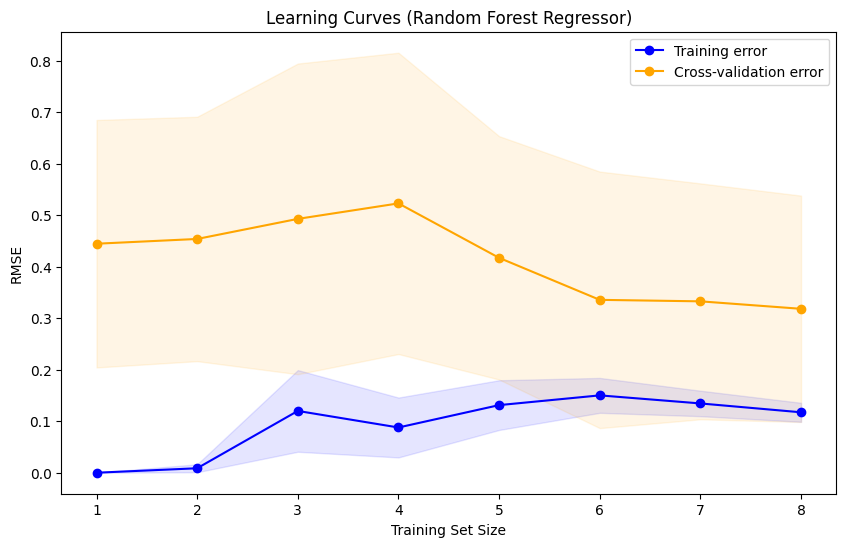

In [ ]:
# Mendapatkan nilai learning curve dengan 5-fold cross-validation
train_sizes_rfr, train_scores_rfr, test_scores_rfr = learning_curve(
    model_rfr, X_train_rfr, y_train_rfr.values.ravel(),
    cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# Menghitung RMSE dari hasil neg_mean_squared_error (merubah nilai ke positif dan mengambil akar)
train_rmse_rfr = np.sqrt(-train_scores_rfr)
test_rmse_rfr = np.sqrt(-test_scores_rfr)

# Menghitung rata-rata dan standar deviasi dari RMSE untuk data latih dan validasi
train_mean_rfr = np.mean(train_rmse_rfr, axis=1)
train_std_rfr = np.std(train_rmse_rfr, axis=1)
test_mean_rfr = np.mean(test_rmse_rfr, axis=1)
test_std_rfr = np.std(test_rmse_rfr, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes_rfr, train_mean_rfr, 'o-', color="blue", label="Training error")
plt.fill_between(train_sizes_rfr, train_mean_rfr - train_std_rfr, train_mean_rfr + train_std_rfr, alpha=0.1, color="blue")

plt.plot(train_sizes_rfr, test_mean_rfr, 'o-', color="orange", label="Cross-validation error")
plt.fill_between(train_sizes_rfr, test_mean_rfr - test_std_rfr, test_mean_rfr + test_std_rfr, alpha=0.1, color="orange")

# Menambahkan label dan judul
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.title("Learning Curves (Random Forest Regressor)")
plt.legend(loc="best")
plt.show()

**Penjelasan Singkat:**

Kode ini menggunakan fungsi `learning_curve()` untuk mengevaluasi performa model **Random Forest Regressor** dengan mengukur error pada data pelatihan dan data validasi silang untuk berbagai ukuran subset data latih. Fungsi ini melakukan **cross-validation** dengan beberapa subset data yang berbeda untuk menghitung rata-rata error model pada tiap ukuran set data latih, menggunakan **Root Mean Squared Error (RMSE)** sebagai metrik evaluasi. Hasilnya kemudian dipetakan dalam sebuah grafik, dengan garis biru menunjukkan training error dan garis oranye menunjukkan cross-validation error, masing-masing menggambarkan seberapa baik model mempelajari data latih dan seberapa baik kemampuannya menggeneralisasi data baru. Area bayangan di sekitar garis menunjukkan variasi (standard deviation) pada error tersebut. Plot ini membantu mengidentifikasi masalah seperti overfitting atau underfitting dan memberikan wawasan tentang kemampuan generalisasi model.

**Insight:**

* **Analisis Plot:**

 * Garis Training Error (Biru): Menunjukkan kesalahan pada data latih. Semakin besar ukuran data latih, kesalahan pada data latih cenderung berkurang dan mendekati konvergensi. Pada kasus ini, training error cukup rendah dan tetap stabil seiring bertambahnya ukuran data latih, menunjukkan bahwa model mampu mempelajari pola dalam data latih dengan baik.

 * Garis Cross-Validation Error (Oranye): Menunjukkan seberapa baik model dapat menggeneralisasi pada data baru (yang tidak dilibatkan dalam pelatihan). Nilai cross-validation error pada grafik ini lebih tinggi daripada training error tetapi stabil saat ukuran data latih bertambah. Hal ini mengindikasikan bahwa model memiliki kemampuan generalisasi yang cukup baik.

 * Area Bayangan: Menunjukkan standard deviation atau rentang variasi dari error pada tiap titik. Rentang variasi yang besar pada cross-validation error mengindikasikan bahwa performa model mungkin bervariasi tergantung pada subset data yang digunakan.

* **Insight yang Diperoleh:**

 * Bias-Rendah, Variance-Sedang: Training error rendah dan tetap stabil, sedangkan cross-validation error lebih tinggi namun stabil. Ini menunjukkan model mampu mempelajari data pelatihan dengan baik (bias rendah) tetapi masih memiliki variance yang dapat diperbaiki lebih lanjut.
 * Generalization: Perbedaan antara training error dan cross-validation error mengindikasikan adanya sedikit overfitting, namun model masih bisa menggeneralisasi dengan baik pada data baru.

* **Rekomendasi untuk Peningkatan:**
 * Hyperparameter Tuning: Mengurangi variance bisa dicapai dengan melakukan tuning terhadap parameter Random Forest, seperti jumlah `estimators`, `max_depth`, atau `min_samples_split`.
 * Lebih Banyak Data: Menambah data pelatihan mungkin dapat membantu model belajar lebih baik dan memperkecil cross-validation error.

Learning Curves Model KNN

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:2050: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 5 instead of 10.
  warnings.warn(


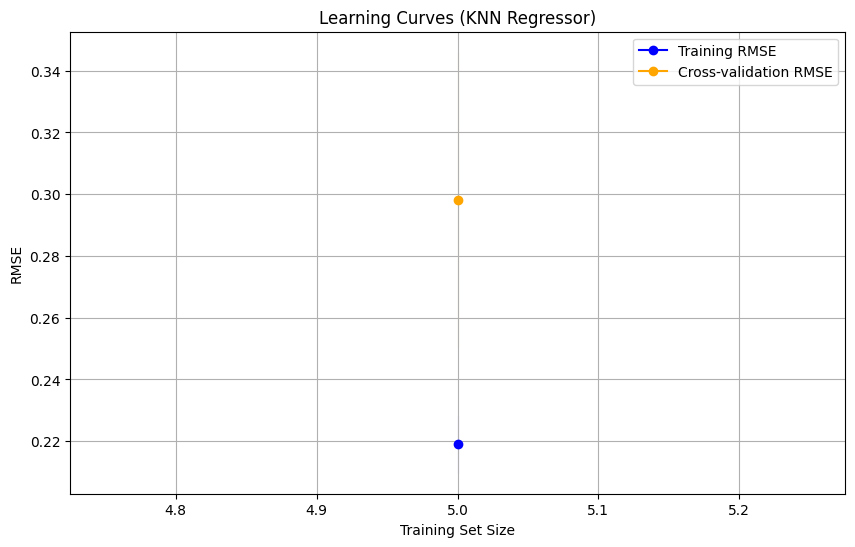

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=5)

# Mendapatkan nilai learning curve dengan 5-fold cross-validation
train_sizes, train_scores, test_scores = learning_curve(
    knn_model,
    X_train,
    y_train.values.ravel() if hasattr(y_train, 'values') else y_train,  # Pastikan y_train bisa diravel
    cv=5,
    scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10),  # Membagi ukuran data latih
    n_jobs=-1  # Memanfaatkan semua core CPU untuk mempercepat
)

# Menghitung RMSE dari hasil neg_mean_squared_error
train_rmse = np.sqrt(-train_scores)
test_rmse = np.sqrt(-test_scores)

# Menghitung rata-rata dan standar deviasi dari RMSE untuk data latih dan validasi
train_mean = np.mean(train_rmse, axis=1)
train_std = np.std(train_rmse, axis=1)
test_mean = np.mean(test_rmse, axis=1)
test_std = np.std(test_rmse, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training RMSE")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")

plt.plot(train_sizes, test_mean, 'o-', color="orange", label="Cross-validation RMSE")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="orange")

# Menambahkan label dan judul
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.title("Learning Curves (KNN Regressor)")
plt.legend(loc="best")
plt.grid()
plt.show()

**Insight**:

Hanya ada beberapa titik yang terlihat pada grafik, yang mengindikasikan bahwa proses perhitungan learning curves pada model KNN tidak menghasilkan variasi data yang jelas (hanya satu titik per ukuran training set).

**Penjelasan singkat**:
1. Model KNN diinisialisasi dengan 5 tetangga terdekat (n_neighbors=5).
2. Learning Curve dihitung dengan fungsi learning_curve, yang mengukur performa model pada berbagai ukuran data latih (10% hingga 100%) menggunakan 5-fold cross-validation.
3. RMSE dihitung dari nilai negatif MSE yang dihasilkan oleh learning_curve.
4. Rata-rata dan standar deviasi dari RMSE dihitung untuk data latih dan validasi.
5. Plotting learning curve, dengan RMSE untuk data latih dan validasi digambarkan, serta area standar deviasi ditampilkan sebagai area bayangan.

## 7. **Jelaskan hasil dari visualisasi learning curves** yang telah dihasilkan sebelumnya pada poin 6

**=> Berdasarkan grafik model Random Forest cenderung stabil.**
- Training error: Kurva training error cenderung menurun seiring bertambahnya jumlah data pelatihan. Selisih antara training error dan cross-validation error tidak terlalu besar: Ini menunjukkan bahwa model tidak terlalu overfitting.
- Cross-validation error: Kurva cross-validation error awalnya menurun, kemudian mencapai titik stabil, dan setelah itu cenderung naik sedikit. penambahan data pelatihan tidak lagi meningkatkan kinerja model secara signifikan.
-  Perbandingan antara training error dan validation error menunjukkan apakah model mengalami overfitting (training error sangat rendah tapi validation error tetap tinggi).
- Ukuran Data yang Optimal: Learning curve menunjukkan apakah kita memiliki cukup data untuk melatih model. kurva stabil, menambah data  tidak memberikan perbaikan signifikan.

**Model KNN**:

Hanya ada beberapa titik yang terlihat pada grafik, yang mengindikasikan bahwa proses perhitungan learning curves pada model KNN tidak menghasilkan variasi data yang jelas (hanya satu titik per ukuran training set).


## 8. **Perbaiki akurasi machine learning** model yang telah dibuat menggunakan **hyperparamater tuning** dan juga **bootstrapping,jika ada**. Jelaskan hasil dari akurasi model (apakah model yang dibuat sudah baik atau belum) yang dibuat beserta prosesnya.

In [ ]:
# Mendefinisikan grid parameter yang akan diuji selama GridSearchCV
param_grid_rfr = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Membuat model RandomForestRegressor dengan random_state=42 untuk hasil yang konsisten
model_rfr = RandomForestRegressor(random_state=42)

# Membuat objek GridSearchCV untuk melakukan pencarian hyperparameter terbaik.
grid_search_rfr = GridSearchCV(estimator=model_rfr, param_grid=param_grid_rfr,
                               cv=5, scoring='neg_mean_squared_error',
                               n_jobs=-1, verbose=2)

# Melatih GridSearchCV pada data pelatihan (X_train_rfr, y_train_rfr)
grid_search_rfr.fit(X_train_rfr, y_train_rfr)

# Mendapatkan hyperparameter terbaik setelah pencarian
best_params_rfr = grid_search_rfr.best_params_
print("Best Hyperparameters:", best_params_rfr)

# Mendapatkan model terbaik yang sudah dituning berdasarkan hyperparameter yang dipilih
best_model_rfr = grid_search_rfr.best_estimator_

# Menggunakan model terbaik tersebut untuk memprediksi nilai target pada data uji (X_test_rfr)
y_pred_rfr = best_model_rfr.predict(X_test_rfr)

# Menghitung mean squared error (MSE) pada data uji setelah tuning hyperparameter
test_mse_rfr = mean_squared_error(y_test_rfr, y_pred_rfr)

# Menghitung R-squared score pada data uji setelah tuning hyperparameter
test_r2_rfr = r2_score(y_test_rfr, y_pred_rfr)

# Menampilkan nilai MSE dan R2 Score setelah tuning
print("Test MSE after tuning:", test_mse_rfr)
print("Test R2 Score after tuning:", test_r2_rfr)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Test MSE after tuning: 0.03912359083333486
Test R2 Score after tuning: 0.833705337914417


**Penjelasan kode:**

Kode di atas menggunakan *hyperparameter tuning* dengan teknik *GridSearchCV* untuk meningkatkan akurasi model *Random Forest Regressor* dalam memprediksi emisi CO2. Beberapa hyperparameter yang dioptimalkan melalui *GridSearch* meliputi:

* `n_estimators`: jumlah pohon dalam *forest* (50, 100, 200),
* `max_depth`: kedalaman maksimum setiap pohon (`None` berarti tidak terbatas),
* `min_samples_split`: jumlah minimal sampel yang diperlukan untuk membagi node (2, 5, 10),
* `min_samples_leaf`: jumlah minimal sampel di setiap daun pohon (1, 2, 4).
Proses ini dilakukan dengan menggunakan *cross-validation* 5 kali lipat (*cv=5*) dan penilaian berdasarkan *negative mean squared error* (MSE), untuk menghindari hasil negatif karena MSE secara alami bernilai positif.

Setelah proses *grid search*, *best parameters* yang diperoleh adalah: `max_depth` tanpa batasan, `min_samples_leaf` 1, `min_samples_split` 2, dan `n_estimators` 200. Model terbaik kemudian digunakan untuk memprediksi nilai pada *test set*.

**Insight:**

Hasil dari prediksi menunjukkan nilai *Mean Squared Error* (MSE) sebesar 0.039 dan skor *R-squared* (R²) sebesar 0.833. Nilai R² mengindikasikan bahwa model mampu menjelaskan sekitar 83.3% variasi dalam data. Secara umum, R² di atas 0.7 sudah dianggap cukup baik untuk model regresi. MSE yang lebih rendah menunjukkan tingkat kesalahan prediksi yang relatif baik, meskipun masih ada ruang untuk perbaikan lebih lanjut jika dibutuhkan akurasi yang lebih tinggi.

Hal ini menunjukkan bahwa model sudah bekerja dengan baik, namun performa dapat diperbaiki lebih jauh dengan melakukan *hyperparameter tuning* tambahan atau teknik lainnya.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:2050: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 8 instead of 10.
  warnings.warn(


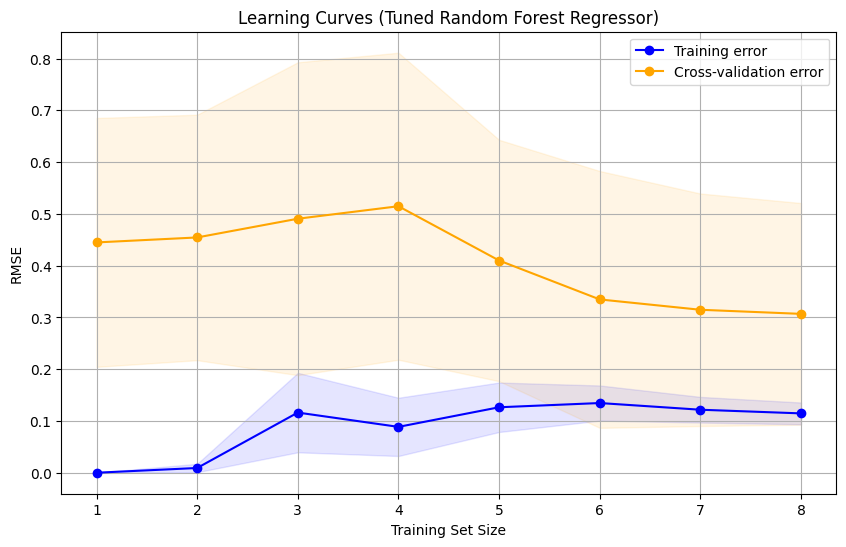

In [ ]:
# Mendapatkan nilai learning curve dengan 5-fold cross-validation menggunakan model yang sudah dituning
train_sizes_rfr, train_scores_rfr, test_scores_rfr = learning_curve(
    best_model_rfr, X_train_rfr, y_train_rfr.values.ravel(),
    cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Menghitung RMSE dari hasil neg_mean_squared_error (merubah nilai ke positif dan mengambil akar)
train_rmse_rfr = np.sqrt(-train_scores_rfr)
test_rmse_rfr = np.sqrt(-test_scores_rfr)

# Menghitung rata-rata dan standar deviasi dari RMSE untuk data latih dan validasi
train_mean_rfr = np.mean(train_rmse_rfr, axis=1)
train_std_rfr = np.std(train_rmse_rfr, axis=1)
test_mean_rfr = np.mean(test_rmse_rfr, axis=1)
test_std_rfr = np.std(test_rmse_rfr, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes_rfr, train_mean_rfr, 'o-', color="blue", label="Training error")
plt.fill_between(train_sizes_rfr, train_mean_rfr - train_std_rfr, train_mean_rfr + train_std_rfr, alpha=0.1, color="blue")

plt.plot(train_sizes_rfr, test_mean_rfr, 'o-', color="orange", label="Cross-validation error")
plt.fill_between(train_sizes_rfr, test_mean_rfr - test_std_rfr, test_mean_rfr + test_std_rfr, alpha=0.1, color="orange")

# Menambahkan label dan judul
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.title("Learning Curves (Tuned Random Forest Regressor)")
plt.legend(loc="best")
plt.grid()
plt.show()

**Penjelasan kode:**

Kode di atas menggunakan fungsi learning_curve dari scikit-learn untuk mengevaluasi performa model Random Forest Regressor terbaik setelah hyperparameter tuning. Model terbaik (`best_model_rfr`) dievaluasi dengan menggunakan cross-validation sebanyak 5 kali lipat (5-fold CV) untuk berbagai ukuran subset data pelatihan, mulai dari 10% hingga 100% dari total data pelatihan. Metrik yang digunakan adalah `neg_mean_squared_error`, yang kemudian diubah menjadi nilai positif dan diambil akarnya untuk mendapatkan Root Mean Squared Error (RMSE), karena RMSE lebih intuitif untuk interpretasi.

Hasil dari learning_curve ini mencakup nilai rata-rata dan standar deviasi dari RMSE untuk data pelatihan dan validasi pada setiap ukuran subset data pelatihan. Data tersebut divisualisasikan dalam grafik learning curve, dengan:
- Sumbu X: Ukuran data pelatihan (jumlah sampel pelatihan)
- Sumbu Y: Nilai RMSE (semakin kecil, semakin baik performanya)
- Area bayangan: Standar deviasi untuk menunjukkan variasi antar fold dalam cross-validation.

**Insight:**

- Error Data Pelatihan: Grafik menunjukkan bahwa training error (garis biru) sangat rendah pada semua ukuran data pelatihan. Hal ini menunjukkan bahwa model sangat baik dalam mempelajari data pelatihan, yang merupakan salah satu kekuatan utama dari algoritma Random Forest. Stabilitas training error juga menunjukkan bahwa model mampu memanfaatkan semua data pelatihan secara efektif.

- Error Data Validasi: Validation error (garis oranye) lebih tinggi dibandingkan training error, terutama pada ukuran data pelatihan kecil. Namun, error validasi menurun secara bertahap seiring bertambahnya ukuran data pelatihan, hingga akhirnya menjadi lebih stabil saat data pelatihan mendekati maksimum. Hal ini menunjukkan bahwa model dapat melakukan generalisasi dengan lebih baik pada data yang belum pernah dilihat.

- Gap antara Training dan Validation Error: Pada subset data kecil, terdapat gap yang cukup besar antara training error dan validation error, yang menandakan potensi overfitting. Namun, gap ini mengecil seiring bertambahnya ukuran data pelatihan, menunjukkan bahwa model semakin seimbang antara bias dan variansi. Gap yang kecil pada akhir grafik adalah karakteristik yang wajar untuk model Random Forest, terutama ketika data pelatihan sudah cukup besar.

- Stabilitas dan Generalisasi: Pada ukuran data pelatihan yang besar, validation error menjadi lebih stabil, dan gap dengan training error tetap kecil. Ini menunjukkan bahwa model memiliki performa generalisasi yang baik dan mampu menangkap pola dalam data tanpa terlalu banyak overfitting.


Kesimpulannya, learning curve di atas menunjukkan bahwa model Random Forest Regressor yang telah dituning berhasil mengatasi masalah overfitting pada subset data kecil, sekaligus menunjukkan peningkatan generalisasi pada subset data yang lebih besar. Gap yang kecil antara training error dan validation error menandakan bahwa model memiliki keseimbangan yang baik antara bias dan variansi. Meskipun begitu, masih ada ruang untuk perbaikan lebih lanjut dengan menambahkan data pelatihan atau melakukan optimasi tambahan. Secara keseluruhan, model siap digunakan untuk memprediksi data uji dengan hasil yang diharapkan cukup baik.

Hyperparameter Tuning KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Parameter grid untuk KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],       # Jumlah tetangga terdekat
    'weights': ['uniform', 'distance'],   # Bobot tetangga
    'p': [1, 2]                           # p=1 untuk Manhattan Distance, p=2 untuk Euclidean Distance
}

# Inisialisasi model KNeighborsRegressor
model = KNeighborsRegressor()

# Membuat GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error',
                           n_jobs=-1, verbose=2)

# Melatih GridSearchCV pada data pelatihan
grid_search.fit(X_train, y_train.values.ravel())

# Mendapatkan hyperparameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Mendapatkan model terbaik
best_model = grid_search.best_estimator_

# Memprediksi pada data uji
y_pred = best_model.predict(X_test)

# Evaluasi model
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f"Test MSE after tuning: {test_mse:.4f}")
print(f"Test R² Score after tuning: {test_r2:.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Test MSE after tuning: 0.0079
Test R² Score after tuning: 0.2138


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [-0.03077556 -0.0205235  -0.03904889 -0.02856615 -0.0586744  -0.03220349
 -0.0586744  -0.03527079         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan]
  warnings.warn(


**Insight**:
1. Test MSE after tuning: 0.0079:

  Setelah tuning, nilai Mean Squared Error (MSE) pada data uji adalah 0.0079 (semakin kecil, semakin baik).
2. Test R² Score after tuning: 0.2138:

  R² Score sebesar 0.2138, menunjukkan model hanya menjelaskan sekitar 21% variabilitas dari target (performanya relatif rendah).

**Penjelasan singkat**:
1. Inisialisasi Model: Membuat model KNeighborsRegressor.
2. GridSearchCV:
*   Menguji semua kombinasi parameter yang didefinisikan dalam param_grid
menggunakan 5-fold cross-validation.
*   Scoring menggunakan negatif MSE (neg_mean_squared_error) untuk mengevaluasi performa.
3. Training: Melatih model dengan GridSearchCV pada data latih.
4. Hasil Terbaik: Menampilkan kombinasi hyperparameter terbaik (best_params) dan model dengan pengaturan terbaik (best_model).
5. Prediksi & Evaluasi: Model terbaik digunakan untuk memprediksi data uji, lalu menghitung MSE dan R² untuk mengevaluasi performa.

Learning Curves KNN Setelah Hyperparameter Tuning

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:2050: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 5 instead of 10.
  warnings.warn(


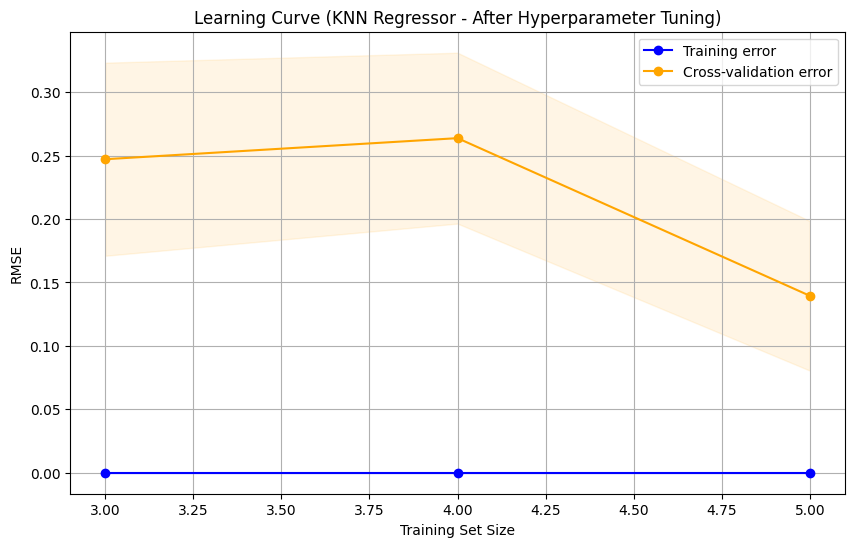

In [ ]:
# Menggunakan model terbaik dari GridSearchCV
best_model = grid_search.best_estimator_

# Menghitung learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train_scaled, y_train.values.ravel(),
    cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Mengubah negatif MSE menjadi positif RMSE
train_rmse = np.sqrt(-train_scores)
test_rmse = np.sqrt(-test_scores)

# Menghitung rata-rata dan standar deviasi dari RMSE untuk data latih dan validasi
train_mean = np.mean(train_rmse, axis=1)
train_std = np.std(train_rmse, axis=1)
test_mean = np.mean(test_rmse, axis=1)
test_std = np.std(test_rmse, axis=1)

# Membuat plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training error")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")

plt.plot(train_sizes, test_mean, 'o-', color="orange", label="Cross-validation error")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="orange")

# Menambahkan judul dan label
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.title("Learning Curve (KNN Regressor - After Hyperparameter Tuning)")
plt.legend(loc="best")
plt.grid()
plt.show()

**Insight**:
1. Training Error (Garis Biru):
  
  Nilai training error (RMSE) mendekati nol di seluruh ukuran data pelatihan. Hal ini menunjukkan bahwa model KNN mampu mempelajari data pelatihan dengan sangat baik (fit sempurna).
2. Cross-validation Error (Garis Orange):

*   Cross-validation error lebih tinggi dibandingkan training error, menunjukkan adanya gap antara performa pada data pelatihan dan validasi.
*   Error ini cenderung menurun seiring dengan bertambahnya ukuran data pelatihan, menunjukkan bahwa model mungkin memerlukan lebih banyak data untuk generalisasi yang lebih baik.

Kesimpulan: Model KNN tampaknya overfit pada data pelatihan, karena training error terlalu rendah dibandingkan dengan cross-validation error.

**Penjelasan singkat**:

1. Menggunakan Model Terbaik

  Model optimal dari GridSearchCV digunakan untuk analisis learning curve.

2. Learning Curve

*   Menggunakan 10 ukuran data latih (10%-100%) dan 5-fold cross-validation.
*   MSE dihitung untuk data latih dan validasi, lalu diubah menjadi RMSE untuk interpretasi yang lebih mudah.

3. Visualisasi
*    Training RMSE dan Validation RMSE digambarkan terhadap ukuran data latih.
*   Area bayangan menunjukkan variasi (standar deviasi) RMSE di setiap ukuran data.

Tujuan: Memahami performa model, apakah terjadi overfitting, underfitting, atau generalisasi yang baik.

## 9. **Gunakan metric evaluation** untuk mengukur model yang telah dibuat sebelumnya.

In [ ]:
# Menggunakan model terbaik (best_model_rfr) untuk memprediksi nilai target pada data uji (X_test_rfr)
y_pred_rfr = best_model_rfr.predict(X_test_rfr)

# Menghitung Mean Squared Error (MSE) pada data uji
test_mse_rfr = mean_squared_error(y_test_rfr, y_pred_rfr)

# Menghitung Root Mean Squared Error (RMSE) dengan mengakarkan nilai MSE
test_rmse_rfr = np.sqrt(test_mse_rfr)

# Menghitung R-squared (R²) score pada data uji, untuk mengevaluasi seberapa baik model menjelaskan variabilitas data
test_r2_rfr = r2_score(y_test_rfr, y_pred_rfr)

# Menampilkan hasil evaluasi metrik MSE, RMSE, dan R² Score
print("Hasil Metric Evaluation:")
print("Test Mean Squared Error (MSE):", test_mse_rfr)
print("Test Root Mean Squared Error (RMSE):", test_rmse_rfr)
print("Test R² Score:", test_r2_rfr)

Hasil Metric Evaluation:
Test Mean Squared Error (MSE): 0.03912359083333486
Test Root Mean Squared Error (RMSE): 0.19779684232397357
Test R² Score: 0.833705337914417


**Penjelasan Singkat:**

Kode di atas melakukan evaluasi performa model setelah model selesai dilatih dan dioptimalkan. Model yang dievaluasi adalah best_model, dan hasilnya diukur pada data uji.

**Insight:**
1. Mean Squared Error (MSE): Nilai MSE pada data uji sebesar 0.0391 menunjukkan rata-rata kesalahan kuadrat antara nilai prediksi dan nilai asli. Semakin kecil nilai MSE, semakin baik model dalam memprediksi data.

2. Root Mean Squared Error (RMSE): RMSE sebesar 0.1977 adalah akar dari MSE, yang memberikan ukuran kesalahan dalam satuan yang sama dengan target. RMSE ini memungkinkan interpretasi kesalahan dalam skala yang sama dengan data asli, dan semakin kecil nilainya, semakin baik model dalam memprediksi data.

3. R² Score: Skor R² sebesar 0.834 menunjukkan bahwa model dapat menjelaskan sekitar 83.4% dari variabilitas data target pada data uji. Semakin mendekati 1, semakin baik model dalam menjelaskan variabilitas data.

Model ini memiliki performa yang cukup baik, terlihat dari nilai MSE dan RMSE yang kecil serta nilai R² yang mendekati 1. Hal ini menunjukkan bahwa model memiliki akurasi yang tinggi dalam memprediksi data pada set uji dan dapat menjelaskan sebagian besar variasi data.

Metric Evaluation Model KNN

In [ ]:
# Menggunakan model terbaik (best_model) untuk memprediksi nilai target pada data uji (X_test)
y_pred = best_model.predict(X_test)

# Menghitung Mean Squared Error (MSE) pada data uji
test_mse = mean_squared_error(y_test, y_pred)

# Menghitung Root Mean Squared Error (RMSE) dengan mengakarkan nilai MSE
test_rmse = np.sqrt(test_mse)

# Menghitung R-squared (R²) score pada data uji, untuk mengevaluasi seberapa baik model menjelaskan variabilitas data
test_r2 = r2_score(y_test, y_pred)

# Menampilkan hasil evaluasi metrik MSE, RMSE, dan R² Score
print("Hasil Metric Evaluation:")
print("Test Mean Squared Error (MSE):", test_mse)
print("Test Root Mean Squared Error (RMSE):", test_rmse)
print("Test R² Score:", test_r2)

Hasil Metric Evaluation:
Test Mean Squared Error (MSE): 0.00786161966546753
Test Root Mean Squared Error (RMSE): 0.08866577505141164
Test R² Score: 0.21383803345324837


**Insight**:
*   Nilai MSE sebesar 0.0079 menunjukkan rata-rata kesalahan kuadrat antara nilai prediksi dan nilai aktual.
Semakin kecil nilai ini, semakin baik model dalam memprediksi data uji.
*   Nilai RMSE sebesar 0.0887 adalah akar kuadrat dari MSE.
RMSE memiliki satuan yang sama dengan data target, sehingga lebih mudah untuk memahami seberapa jauh rata-rata prediksi model dari nilai aktual.
Nilai yang rendah menunjukkan performa model yang baik.
*   Nilai R² sebesar 0.2138 menunjukkan bahwa 21.38% variansi dalam data target dapat dijelaskan oleh model.
Nilai ini relatif rendah, yang berarti bahwa model belum mampu menjelaskan pola dalam data secara optimal. Sisanya (78.62%) adalah noise atau pola yang tidak tertangkap oleh model.

Kesimpulan:
Model memiliki tingkat kesalahan prediksi yang rendah (dilihat dari MSE dan RMSE), tetapi kemampuan model dalam menjelaskan hubungan antara fitur dan target cukup rendah (R² Score kecil).

**Penjelasan singkat**:

1. Memprediksi nilai pada data uji (X_test) menggunakan model terbaik.
2. Menghitung MSE untuk mengukur kesalahan prediksi.
3. Menghitung RMSE dengan mengakarkan MSE untuk memberikan kesalahan dalam satuan yang sama dengan data.
4. Menghitung R² score untuk mengukur seberapa baik model menjelaskan variasi data.
5. Menampilkan hasil evaluasi metrik MSE, RMSE, dan R².

## 10.Berikan **interpretasi dari hasil metric evaluation** serta **alasan pemilihan metric** yang dipilih pada poin 9

**=> Interpretasi dari Hasil Metric Evaluation Model Random Forest:**
1. Mean Squared Error (MSE): Nilai MSE pada data uji sebesar 0.03912359083333486 menunjukkan rata-rata kesalahan kuadrat antara nilai prediksi dan nilai asli. Semakin kecil nilai MSE, semakin baik model dalam memprediksi data.

2. Root Mean Squared Error (RMSE): RMSE sebesar 0.19779684232397357 adalah akar dari MSE, yang memberikan ukuran kesalahan dalam satuan yang sama dengan target. Angka ini menunjukkan rata-rata tingkat deviasi prediksi terhadap nilai sebenarnya, yang berada dalam skala target. Nilai yang kecil menunjukkan bahwa model memiliki kesalahan prediksi yang relatif kecil, meskipun masih ada ruang untuk perbaikan.

3. R² Score: Skor R² sebesar 0.833705337914417 menunjukkan bahwa model dapat menjelaskan sekitar 83.37% dari variabilitas data target pada data uji. Ini menunjukkan model cukup baik dalam menjelaskan pola data, meskipun tidak sempurna. Semakin mendekati 1, semakin baik model dalam menjelaskan variabilitas data.

Secara keseluruhan, model ini memiliki performa yang cukup baik, dengan kesalahan prediksi yang kecil (RMSE dan MSE) serta kemampuan menjelaskan sebagian besar variasi data (R² Score). Namun, hasil ini juga menunjukkan bahwa sekitar 16.63% variabilitas dalam data target tidak dapat dijelaskan oleh model, yang dapat dijadikan peluang untuk melakukan penyempurnaan model.

**=> Hasil Metric Evaluation Model KNN**
*   Nilai MSE sebesar 0.0079 menunjukkan rata-rata kesalahan kuadrat antara nilai prediksi dan nilai aktual.
Semakin kecil nilai ini, semakin baik model dalam memprediksi data uji.
*   Nilai RMSE sebesar 0.0887 adalah akar kuadrat dari MSE.
RMSE memiliki satuan yang sama dengan data target, sehingga lebih mudah untuk memahami seberapa jauh rata-rata prediksi model dari nilai aktual.
Nilai yang rendah menunjukkan performa model yang baik.
*   Nilai R² sebesar 0.2138 menunjukkan bahwa 21.38% variansi dalam data target dapat dijelaskan oleh model.
Nilai ini relatif rendah, yang berarti bahwa model belum mampu menjelaskan pola dalam data secara optimal. Sisanya (78.62%) adalah noise atau pola yang tidak tertangkap oleh model.

**=> Alasan Pemilihan Metric MSE dan RMSE**

- MSE dipilih karena metrik ini mengukur kesalahan prediksi secara kuadrat, memberikan penalti yang lebih besar untuk kesalahan besar, sehingga sangat membantu dalam mendeteksi prediksi yang jauh meleset (outliers).
- RMSE dipilih karena lebih mudah diinterpretasikan dalam satuan yang sama dengan target aslinya, sehingga memberikan gambaran seberapa jauh rata-rata prediksi meleset dari nilai sebenarnya. Ini sangat relevan saat kami ingin memahami besar kesalahan dalam skala yang sama dengan data.
- R² Score dipilih untuk memberikan gambaran tentang seberapa baik model dalam menjelaskan variasi di dalam data. Nilai ini memungkinkan kami untuk melihat kualitas prediksi secara keseluruhan, di mana skor mendekati 1 menunjukkan model yang baik dalam menjelaskan pola di data, sedangkan nilai mendekati 0 menunjukkan model yang lemah.
Dengan menggabungkan MSE, RMSE, dan R² Score, kami mendapatkan gambaran menyeluruh tentang performa model: dari seberapa besar kesalahannya (RMSE dan MSE) hingga seberapa baik model menjelaskan variasi data (R²).
